In [1]:
# Reference_links : https://www.kaggle.com/code/jasonheesanglee/nah-nevermind-eda-spellcheck-comparison/notebook

In [2]:
# '!' 는 셸 명령어를 실행하는 명령여, 주피터 노트북과 같은 환경에서 셸 명령어를 실행할 수 있도록 한다
# pip install 은 파이썬 패키지 관리자인 pip를 사용하여 패키지를 설치하는 명령어.  (제거 명령어도 있음)
# 설치할 패키지의 경로를 지정한 것으로, 이 경로에 위치한 autocorrect-2.6.1.tar 파일을 설치하라는 명령어.
# tar 파일은 여러개의 파일 및 폴더를 하나로 묶어 압축하는데 주로 사용되는 파일 형식, "tar"는 "tape archive"의 약자
! pip install "/kaggle/input/autocorrect/autocorrect-2.6.1.tar"

Processing /kaggle/input/autocorrect/autocorrect-2.6.1.tar
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=a7e1618be7d17729d2731ed26875c6007ecca8b7d53b51a30baf473c6a04f9c4
  Stored in directory: /root/.cache/pip/wheels/db/69/42/0fb0421d2fe70d195a04665edc760cfe5fd341d7bb8d8e0aaa
Successfully built autocorrect


# Installing Libraries & Locating Input Files

실제 대회에서는 이 데이터 세트를 입력에 추가하고 아래 코드를 통해 심스펠피를 설치할 수 있습니다.
인터넷에 연결되어 있지 않기 때문에 간단한 pip 설치로는 심스펠피를 설치할 수 없습니다.

!pip install /kaggle/input/symspell-677/editdistpy-0.1.3-cp310-cp310-linux_x86_64.whl <br>
!pip install /kaggle/input/symspell-677/symspellpy-6.7.7-py3-none-any.whl


파이스펠체크의 경우, 입력에 이 데이터세트를 추가하세요.
!.pip 설치 /kaggle/input/nlp-set/nlp_set/whl/pyspellchecker-0.7.2-py3-none-any.whl

In [3]:
!pip install /kaggle/input/symspell-677/editdistpy-0.1.3-cp310-cp310-linux_x86_64.whl
!pip install /kaggle/input/symspell-677/symspellpy-6.7.7-py3-none-any.whl

Processing /kaggle/input/symspell-677/editdistpy-0.1.3-cp310-cp310-linux_x86_64.whl
Processing /kaggle/input/symspell-677/symspellpy-6.7.7-py3-none-any.whl


In [4]:
# !pip install -qqq pyspellchecker autocorrect symspellpy -U textblob
# kaggle에서 모델 불러올려면 Data나 Model 에서 추가하고 아래처럼 사용하면 됨


# 해당 경로에 있는 파이썬 패키지를 설치하기 위해 사용 
# whl은 python 패키지의 바이너리 분포 형식 중 하나로, 패키지를 쉽게 설치하고 또는 관리할 수 있도록 설계
# 일반적으로 파이썬 패키지는 소스 코드로 배포되며 사용자가 직접 빌드하고 설치해야하는데 
# whl 파일은 미리 빌드된 바이너리 패키지로 특정환경에서 컴파일하지 않고도 쉽게 설치할 수 있다.
!pip install /kaggle/input/pyspellchecker/pyspellchecker-0.7.2-py3-none-any.whl

Processing /kaggle/input/pyspellchecker/pyspellchecker-0.7.2-py3-none-any.whl


In [5]:
# !pip install -qqq pyspellchecker autocorrect symspellpy -U textblob

In [6]:
import warnings # 경고 메시지를 처리하기 위한 warnings 모듈을 임포트
warnings.filterwarnings(action='ignore') # 모든 경고 메시지를 무시하도록 경고 필터를 설정
import numpy as np # numpy 라이브러리를 임포트. numpy는 과학적 과학적 계산을 위한 다차원 배열과 함수.
import pandas as pd # pandas 라이브러리 임포트 pandas는 데이터 조작과 분석을 위해 사용
import os # 운영체제와 상호작용하기 위한 모듈 
import re # 정규 표현식을 다루기 위한 라이브러리
import seaborn as sns # 시각화 라이브러리로 Matplotlib를 기반으로 더 아름다운 그래프를 생성할 수 있게 해준다.
import matplotlib.pyplot as plt # 데이터 시각화를 위한 matplotlib의 서브 패키지

from textblob import TextBlob # 텍스트 데이터를 다루기 위한 라이브러리, 텍스트 분석 및 처리 기능을 제공
from textblob import Word # TextBlob에서 단어 관련 작업을 수행하기 위한 클래스
from spellchecker import SpellChecker # 철자 오류를 검사하고 교정하는 기능을 제공하는 라이브러리 (pyspellchecker)
from autocorrect import Speller # 철자 오류를 자동으로 교정하는 기능을 제공하는 라이브러리  (autocorrect)
from symspellpy import SymSpell, Verbosity

from itertools import islice # 이터러블을 슬라이스 하는 기능을 제공하는 모듈
import pkg_resources # 패키지와 리소스에 접근할 수 있도록 하는 도구

import unidecode # 유니코드 문자열을 ASCII로 변환해주는 라이브러리
from wordcloud import WordCloud # 단어구름 (Word Cloud)을 생성하기 위한 라이브러리

# 어간(Stem)을 추출하는 작업을 어간 추출(stemming)이라고 합니다. 어간 추출은 형태학적 분석을 단순화한 버전이라고 볼 수도 있고,
# 정해진 규칙만 보고 단어의 어미를 자르는 어림짐작의 작업이라고 볼 수도 있다
# Netural Language Toolkit (nltk)
import nltk# 자연어 처리를 위한 라이브러리, 토큰화, sotpword(불용어) 제거, 어간 추출(Stemming)등 다양한 NLP 기능을 제공

from nltk.corpus import stopwords # nltk에서 제공하는 stopword(불용어) 목록들
from stop_words import get_stop_words # stopward(불용어) 목록을 가져오는 라이브러리
import string # 문자열 처리를 위한 Python 내장 모듈
import math # 수학 함수와 상수를 제공하는 Python 내장 모듈
import tensorflow as tf # 딥러닝 프레임 워크인 텐서 플로우를 사용하기 위한 라이브러리
import transformers # Hugging Face의 Trasformers 라이브러리로, 트랜스포머 모델을 다루는데 사용
from transformers import BertTokenizerFast # BERT의 토크나이저 클래스
from tqdm.auto import tqdm # 작업 진행상황을 시각적으로 표시하기 위한 라이브러리




# for dirname, _, filenames in os.walk('/kaggle/input') 해당 코드는 탐색한 각 디렉토리마다,
#  디렉토리 경로를 dirname에 그 안의 파일 이름들을 filenames에 할당 '_' 기호는 사용하지 않을 값을 무시할때 사용
# os.walk() 함수는 튜플 형태로 세 개의 값을 반환하는데 그 값들은 (현재 디렉토리의 이름, 현재 디렉토리의 하위 디렉토리 목록(list), 현재 디렉토리의 파일 목록(list))을 반환
# 이 코드에서는 os.walk() 함수의 두 번째 값인 하위 디렉토리 목록을 사용하지 않기 위해 '_' 기호로 무시한다.
for dirname, _, filenames in os.walk('/kaggle/input'): # os.walk에 반환된 튜플 형태의 값을 언팩킹 하면 (str, list, list) 형태로 나옴
#     print(f"dirname : {dirname},\nfilenames : {filenames}")
#     print("")
    for filename in filenames: # 파일 목록의 리스트를 하나씩 접근
        print(os.path.join(dirname, filename)) # 현재 디렉토리와 파일 이름을 합쳐서 전체 경로를 출력
    print("\n\n")




/kaggle/input/commonlit-evaluate-student-summaries/sample_submission.csv
/kaggle/input/commonlit-evaluate-student-summaries/prompts_train.csv
/kaggle/input/commonlit-evaluate-student-summaries/summaries_test.csv
/kaggle/input/commonlit-evaluate-student-summaries/summaries_train.csv
/kaggle/input/commonlit-evaluate-student-summaries/prompts_test.csv



/kaggle/input/pyspellchecker/pyspellchecker-0.7.2-py3-none-any.whl



/kaggle/input/autocorrect/autocorrect-2.6.1.tar



/kaggle/input/symspell-677/symspell_freq_dict.txt
/kaggle/input/symspell-677/frequency_dictionary_en_82_765.txt
/kaggle/input/symspell-677/symspellpy-6.7.7-py3-none-any.whl
/kaggle/input/symspell-677/editdistpy-0.1.3-cp310-cp310-linux_x86_64.whl
/kaggle/input/symspell-677/frequency_bigramdictionary_en_243_342.txt





# CommonLit EDA

230818 업데이트
이 아이디어가 방금 떠올랐습니다:
열차 세트의 원래 점수는 텍스트를 수정하지 않은 채로 점수를 매겼어야 합니다.
철자가 틀린 단어도 채점 지표 중 하나가 될 수 있으므로 철자가 틀린 단어를 수정하는 것이 더 나은 LB 점수를 얻기 위한 올바른 해결책이 아닐 수도 있는 것 같습니다.




In [7]:
# magic command는 IPython 인터프리터에 추가된 특수 명령어 매직커맨드는 명령어 앞에 % 기호를 붙입니다.
# %CD : 현재 작업 디렉터리를 변경합니다. 이 명령은 자동으로 내부 디렉터리 목록을 유지합니다.
# %magic : 매직 커맨드 설명 출력

%cd '/kaggle/input/commonlit-evaluate-student-summaries'

/kaggle/input/commonlit-evaluate-student-summaries


In [8]:
# 각 csv 파일을 읽어와 데이터프레임형태로 저장

prompts_train = pd.read_csv('prompts_train.csv')
summaries_train = pd.read_csv('summaries_train.csv')

prompts_test = pd.read_csv('prompts_test.csv')
summaries_test = pd.read_csv('summaries_test.csv')

sample_submission = pd.read_csv('sample_submission.csv')

In [9]:
# .shape로 데이터프레임의 차원을 나타내는 튜플을 반환한다.
print('prompts_train', prompts_train.shape)
print('')
display(prompts_train.head()) # prompts_train 데이터프레임에 5번째(0, 1, 2, 3, 4)행 내용까지만 확인
print('')
print('summaries_train', summaries_train.shape)
print('')
display(summaries_train.head())
print('')
print('prompts_test',prompts_test.shape)
print('')
display(prompts_test.head())
print('')
print('summaries_test',summaries_test.shape)
print('')
display(summaries_test.head())

prompts_train (4, 4)



prompt_id                                    prompt_question  \
0    39c16e  Summarize at least 3 elements of an ideal trag...   
1    3b9047  In complete sentences, summarize the structure...   
2    814d6b  Summarize how the Third Wave developed over su...   
3    ebad26  Summarize the various ways the factory would u...   

                prompt_title  \
0                 On Tragedy   
1  Egyptian Social Structure   
2             The Third Wave   
3    Excerpt from The Jungle   

                                         prompt_text  
0  Chapter 13 \r\nAs the sequel to what has alrea...  
1  Egyptian society was structured like a pyramid...  
2  Background \r\nThe Third Wave experiment took ...  
3  With one member trimming beef in a cannery, an...


summaries_train (7165, 5)



student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0020ae56ffbf    ebad26  They would rub it up with soda to make the sme...   
2  004e978e639e    3b9047  In Egypt, there were many occupations and soci...   
3  005ab0199905    3b9047  The highest class was Pharaohs these people we...   
4  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   

    content   wording  
0  0.205683  0.380538  
1 -0.548304  0.506755  
2  3.128928  4.231226  
3 -0.210614 -0.471415  
4  3.272894  3.219757


prompts_test (2, 4)



prompt_id prompt_question     prompt_title       prompt_text
0    abc123    Summarize...  Example Title 1  Heading\nText...
1    def789    Summarize...  Example Title 2  Heading\nText...


summaries_test (4, 3)



student_id prompt_id            text
0  000000ffffff    abc123  Example text 1
1  111111eeeeee    def789  Example text 2
2  222222cccccc    abc123  Example text 3
3  333333dddddd    def789  Example text 4

In [10]:
# pd.merge(df_left, df_right, how='inner', on=None)이 default
# 'on=None'는 공통 열이름을 기준으로 inner(교집합) 조인공통 열이름을 기준으로 inner(교집합) 조인


# 분리된 데이터를 하나로 결합
# prompts_train 데이터프레임과 summaries_train 데이터프레임을 합치는 과정
# on='prompt_id'는 두 데이터프레임을 합칠 때 prompt_id 열을 기준으로 합친다는 의미.
# how='left'는 왼쪽 데이터프레임인 prompts_train을 기준으로 합친다는 의미로, prompts_train의 모든 행을 포함하는 결과를 train 데이터 프레임에 저장
train = pd.merge(prompts_train, summaries_train, on='prompt_id', how='left')
print(f'train_combined :\n')


# pd.iloc (위치별 선택을 위한 순수 정수 기반 인덱싱)
# 행 번호(row number)로 선택하는 방법 (.iloc)
# 행이든 열이든 숫자로 location(위치)을 나타내서 selecting or indexing (선택 또는 인덱싱) 하는 방법 
# train.iloc[0]  # 트레인 데이터의 첫번째 행만 츨략
train.iloc[:5] # train에 5개 행을 출력

train_combined :



prompt_id                                    prompt_question prompt_title  \
0    39c16e  Summarize at least 3 elements of an ideal trag...   On Tragedy   
1    39c16e  Summarize at least 3 elements of an ideal trag...   On Tragedy   
2    39c16e  Summarize at least 3 elements of an ideal trag...   On Tragedy   
3    39c16e  Summarize at least 3 elements of an ideal trag...   On Tragedy   
4    39c16e  Summarize at least 3 elements of an ideal trag...   On Tragedy   

                                         prompt_text    student_id  \
0  Chapter 13 \r\nAs the sequel to what has alrea...  00791789cc1f   
1  Chapter 13 \r\nAs the sequel to what has alrea...  0086ef22de8f   
2  Chapter 13 \r\nAs the sequel to what has alrea...  0094589c7a22   
3  Chapter 13 \r\nAs the sequel to what has alrea...  00cd5736026a   
4  Chapter 13 \r\nAs the sequel to what has alrea...  00d98b8ff756   

                                                text   content   wording  
0  1 element of an ideal tragedy is that it shoul... -0.210614 -0.471415  
1  The three elements of an ideal tragedy are:  H... -0.970237 -0.417058  
2  Aristotle states that an ideal tragedy should ... -0.387791 -0.584181  
3  One element of an Ideal tragedy is having a co...  0.088882 -0.594710  
4  The 3 ideal of tragedy is how complex you need... -0.687288 -0.460886

In [11]:
# prompts_test 데이터프레임과 summaries_test 데이터프레임을 합치는 과정
# on='prompt_id'는 두 데이터프레임을 합칠 때 prompt_id 열을 기준으로 합친다는 의미.
# how='left'는 왼쪽 데이터프레임인 prompts_test 기준으로 합친다는 의미로, prompts_test 모든 행을 포함하는 결과를 train 데이터 프레임에 저장
test = pd.merge(prompts_test, summaries_test, on='prompt_id', how='left')
print(f"test_combined :\n")
test

test_combined :



prompt_id prompt_question     prompt_title       prompt_text    student_id  \
0    abc123    Summarize...  Example Title 1  Heading\nText...  000000ffffff   
1    abc123    Summarize...  Example Title 1  Heading\nText...  222222cccccc   
2    def789    Summarize...  Example Title 2  Heading\nText...  111111eeeeee   
3    def789    Summarize...  Example Title 2  Heading\nText...  333333dddddd   

             text  
0  Example text 1  
1  Example text 3  
2  Example text 2  
3  Example text 4

In [12]:
print(f'shape of train data is {train.shape}')
print(f'shape of test data is {test.shape}')

shape of train data is (7165, 8)
shape of test data is (4, 6)


# Target column description

In [13]:
# describe() 메서드는 데이터프레임의 데이터에 대한 설명을 반환합니다.

# count - 비어 있지 않은 값의 수입니다.
# 평균 - 평균(평균) 값입니다.
# std - 표준 편차입니다.
# 최소 - 최소값입니다.
# 25% - 25% 백분위수*입니다.
# 50% - 50% 백분위수*입니다.
# 75% - 75% 백분위수*입니다.
# 최대 - 최대값입니다.

# DataFrame.select_dtypes
# 데이터 유형에 따라 열을 포함/제외하는 데이터 프레임의 하위 집합입니다.


# train 데이터프레임에 'content' 열의 기술통계정보를 출력해준다.
print(f"train content description:\n{train['content'].describe()}") 

# train 데이터프레임에 'wording' 열의 기술통계정보를 출력해준다.
print(f"\ntrain wording description:\n{train['wording'].describe()}")

train content description:
count    7165.000000
mean       -0.014853
std         1.043569
min        -1.729859
25%        -0.799545
50%        -0.093814
75%         0.499660
max         3.900326
Name: content, dtype: float64

train wording description:
count    7165.000000
mean       -0.063072
std         1.036048
min        -1.962614
25%        -0.872720
50%        -0.081769
75%         0.503833
max         4.310693
Name: wording, dtype: float64


In [14]:
train.loc[train['content'] > -2, 'content']

0      -0.210614
1      -0.970237
2      -0.387791
3       0.088882
4      -0.687288
          ...   
7160    1.520355
7161   -1.204574
7162    0.328739
7163    0.205683
7164    1.771596
Name: content, Length: 7165, dtype: float64

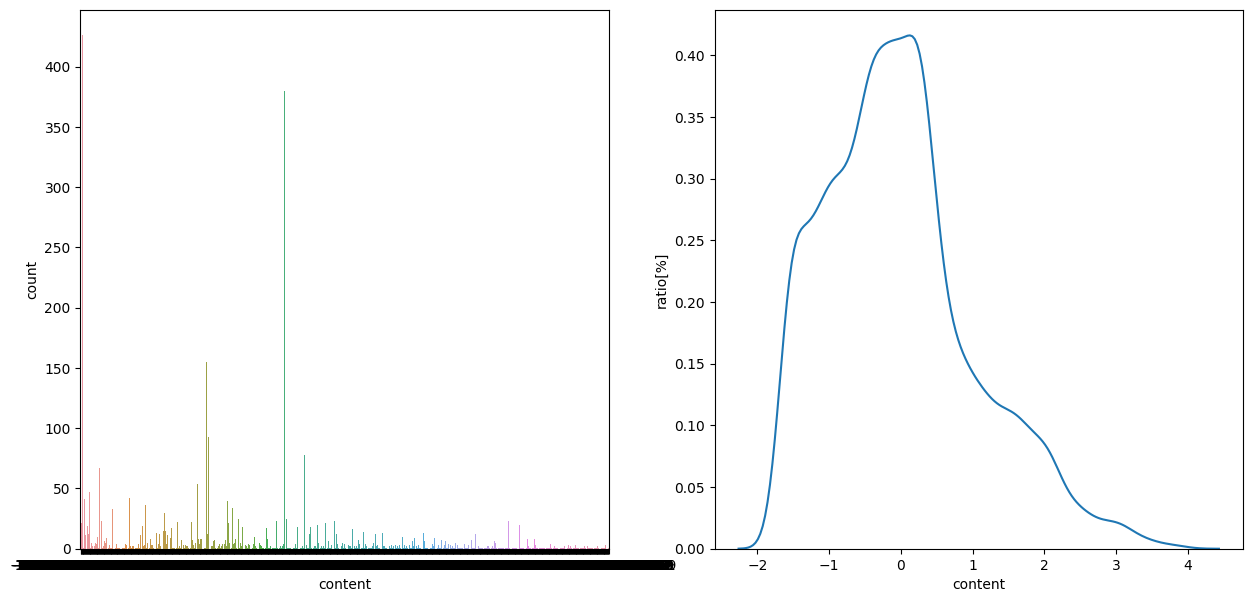

In [15]:
# 데이터프레임을 반복문에 그냥 실행시키면 컬럼이름만 나오게 됨
main_cols = [column for column in train] # 데이터프레임의 모든 열 이름을 리스트 'main_cols'에 저장

# subplots (nrows(행), ncols(열),figsize(가로, 세로)) 생설할 서브 플롯의 행, 열의 수를 지정하고, 그림의 전체크기를 지정
# fig : 전체 그림(figure)객체입니다. 이 객체를 통해 전체 그림의 속성을 설정하거나 그림을 저장하는 등의 작업을 수행할 수 있다.
# ax1, ax2 : 축(axes) 정보를 담고 있는 리스트, 'axes' 리스트의 각 원소는 하나의 서브플롯을 나타내며, 각 서브플롯을 그릴때 헤딩 측 객체를 사용
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7)) 


# 첫 번재 서브 플롯 'ax1'에는 train 데이터프레임에서 'content'열의 값들을 카운트하여 막대그래프로 표시 
sns.countplot(x='content', data=train, ax=ax1) # 첫 번째 서브플롯 ax1에는 train 데이터 프레임에서 'content'열의 값들을 카운트하여 막대 그래프로 표시

# 두 번째 서브플롯 'ax2'에는 'content'열에서 값이 -2보다 큰 행만 추출하여, 이를 커널 밀도 추정 그래프로 표시, 해당 그래프는 'content'열 값의 분포를 부드럽게 보여준다.
sns.kdeplot(train.loc[train['content'] > -2, 'content'], ax=ax2)
ax2.set_ylabel('ratio[%]') # 두 번째 서브플롯 'ax2'의 y축 레이블을 'ratio[%]'
ax2.set_xlabel('content') # x축 레이블을 'contente'로 설정
plt.show() # 그래프를 화면에 표시

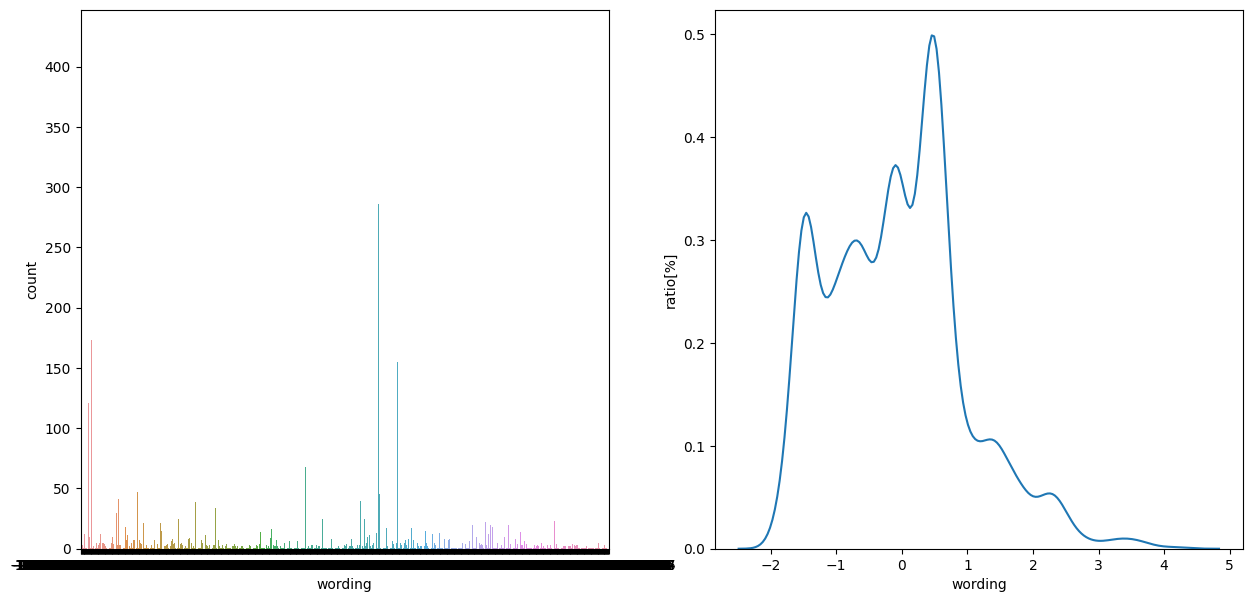

In [16]:
main_cols = [column for column in train] # 데이터프레임의 모든 열 이름을 리스트 'main_cols'에 저장
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7)) # figure와 두 개의 (subplot) ax1과 ax2를 생성합니다. 그림은 1행 2열로 나뉘며, 전체 그림의 크기는 가로 15인치, 세로 7인치로 설정
sns.countplot(x='wording', data=train, ax=ax1) # 첫 번째 서브플롯 ax1에는 train 데이터 프레임에서 'content'열의 값들을 카운트하여 막대 그래프로 표시
sns.kdeplot(train.loc[train['wording']>-2, 'wording'], ax=ax2) # 두 번째 서브플롯 'ax2'에는 'content'열에서 값이 -2보다 큰 행만 추출하여, 이를 커널 밀도 추정 그래프로 표시, 해당 그래프는 'content'열 값의 분포를 부드럽게 보여준다.
ax2.set_ylabel('ratio[%]') # 두 번째 서브플롯 'ax2'의 y축 레이블을 'ratio[%]'
ax2.set_xlabel('wording') # x축 레이블을 'wording'로 설정
plt.show() # 그래프를 화면에 표시

# Stop words & addition

In [17]:
# 불필요한 단어들을 제거하기 위한 작업을 수행

# NLTK에서 라이브러리에서 제공하는 영어 불용어(stop words) 리스트를 가져오고 불용어는 텍스트에서 일반적으로 무시되는 단어로, 자주 나타나지만 문맥을 분석하는데 도움이 되지 않는 단어들
stop_words = stopwords.words('english')
print(f'stop_words[-15 : ]\n{stop_words[-15 : ]}\n') # 뒤에서부터 15개의 항목을 슬라이싱해서 가져와서 보여준다.
_stop_words = list(get_stop_words('en')) # get_stop_words 함수에서 제공하는 또다른 영어 불용어 리스트를 가져온다.
stop_words.extend(_stop_words) # NLTK에서 가져온 불용어 리스트와 get_stop_words에서 가져온 불용어 리스트를 합친다.
additional_words = ['also', 'day', 'would', 'could', 'made', 'make', 'else', 'either', 'neither', 'may', 'must'] # 직접 추가할 불용어 단어들의 리스트
stop_words.extend(additional_words) # stop_words에 직접 추가한 불용어 리스트가지 합친다.
print(f'stop_words[-15 : ]:\n{stop_words[-15:]}\n') # 최종적으로 만들어진 불용어 리스틀 출력

stop_words[-15 : ]
["mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

stop_words[-15 : ]:
['your', 'yours', 'yourself', 'yourselves', 'also', 'day', 'would', 'could', 'made', 'make', 'else', 'either', 'neither', 'may', 'must']



# 워드 클라우드, 텍스트 통계, 단어 수 전처리 및 & 맞춤법 오류 감지

In [18]:
train_prompt_id_list = list(set(train['prompt_id'])) # train 데이터프레임에 prompt_id 열에 있는 중복된 값들은 제외하고 고유한 값들만 추출하여 리스트 형태로 변환 후 저장
train_prompt_id_list # prompt_id 열에 있는 값들중 중복은 제외되고 고유한 값들만 출력됨.

['39c16e', '3b9047', 'ebad26', '814d6b']

In [19]:
# 워드 클라우드(Word Cloud)를 생성하고 시각화하는 역할

# df : 워드 클라우드를 생성할 데이터 프레임
# col_name : 워드 클라우드를 생성할 때 조건으로 사용 할 열의 이름, 여기서는 content 점수와 wording 점수를 -2보다 큰 값들을 기준으로 잡기 위해서
# prompt : 워드 클라우드에 표시되는 단어(값)들을 사용할 열의 이름, 
# prompt_id : 특정 'prompt_id'에 해당하는 데이터를 선택하기 위한 값, # 39c16e, 3b9047, ebad26, 814d6b
# title : 워드 클라우드의 제목
# min_score : 열에서 특정 값 이상인 데이터만 워드클라우드에 사용하도록 필터링하고 기본값은 -2




# 워드 클라우드를 생성하고 설정합니다. 워드 클라우드의 설정에는 최대 및 최소 글꼴 크기, 최대 단어 수, 배경색, 텍스트 색상 등이 포함됩니다.
# 워드 클라우드를 생성하고 시각화하기 위해 Matplotlib를 사용하여 그림을 만듭니다.
# 이 함수를 호출할 때 주어진 조건에 맞는 데이터를 선택하고 해당 데이터를 사용하여 워드 클라우드를 생성하며, 워드 클라우드의 제목을 설정하여 시각화합니다.

def generate_word_cloud(df, col_name, prompt, prompt_id, title, min_score=-2):
    
    # 데이터프레임에서 df['prompt_id']열과 입력받은 promptid의 값이 일치하고 데이터프레임의[col_name] 열의 값이 min_score 보다 큰 데이터를 선택하고 
    # 해당 조건에 맞는 prompt( 여기서는'text')열의 내용들만 출력한다. 그리고 리스트로 변환해서 text_list 변수에 저장
    # 해밑에 코드 이해 안되면 train[(train['prompt_id'] == '39c16e') & (train['content'] > -2)]['text'].tolist 이거 출력해보면 이해하기 좋음
    text_list = df[(df['prompt_id'] == prompt_id) & (df[col_name] > min_score)][prompt].tolist()
    texts = " ".join(text_list).lower() # text_list의 텍스트들을 모두 소문자로 변환 후 공백으로 구분해서 그 내용들을 전부 합쳐서 texts  변수에 저장
    
    # subplots (nrows(행), ncols(열),figsize(가로, 세로)) 생설할 서브 플롯의 행, 열의 수를 지정하고 그림의 전체크기를 지정 , ax는 축 정보를 담고 있는 리스트
    fig, ax = plt.subplots(1, 1, figsize = (10, 5)) 
    ax.set_title(f'{title}', fontsize = 20) # subplot 의 제목을 지정하고 폰트사이즈는 20으로 설정 , ax는 각 원소는 하나의 서브플롯을 나타내며, 각 서브플롯을 그릴때 헤딩 측 객체를 사용
    
    # 워드 클라우드를 생성하고 설정
    wc = WordCloud(max_font_size = 50, # 워드 클라우드에 표시되는 최대 글꼴 크기
                  min_font_size = 10, # 워드 클라우드에 표시되는 최소 글꼴 크기
                  max_words = 100, # 워드 클라우드에 표시댈 최대 단어 수 
                  background_color = 'black', # 워드 클라우드의 배경색
                  color_func = lambda *args, **kwargs : "white", # 워드 클라우드의 글꼴 색상을 지정
                  stopwords=stop_words # 불용어로 처리할 단어 목록, 불용어는 표시되지 않음
                  ).generate(texts) # texts 변수에 있는 텍스트 데이터를 기반으로 워드 크라우드를 생성
    
    
    # 워드 클라우드 이미지를 'ax'(matplotlib 의 Axes 객체) 에 렌더링
    # interpolation은 이미지 보간 방법을 지정하는 매게변수로, "bilinear"라는 이미지를 부드럽게 렌더링 하는 방법 중 하나
    ax.imshow(wc, interpolation = "bilinear") 
    ax.axis("off") # x, y 축의 눈금을 숨김
    plt.show() # 워드 클라우드를 화면에 출력

In [20]:
# def text_description(train_df, test_df, column, prompt_id):
#     # train_df와 test_df를 prompt_id에 따라 필터링하여 각각의 데이터프레임 생성
#     train_filtered = train_df[train_df['prompt_id'] == prompt_id]
#     test_filtered = test_df[test_df['prompt_id'] == prompt_id]
    
#     # 각 데이터프레임에 해당하는 num_words 컬럼 생성
#     train_filtered['num_words'] = train_filtered[column].apply(lambda sen: len(str(sen).split()))
#     test_filtered['num_words'] = test_filtered[column].apply(lambda sen: len(str(sen).split()))
    
#     # 필터링된 데이터프레임을 다시 합침
#     combined_train_df = pd.concat([train_df[train_df['prompt_id'] != prompt_id], train_filtered])
#     combined_test_df = pd.concat([test_df[test_df['prompt_id'] != prompt_id], test_filtered])
    
#     return combined_train_df, combined_test_df

# 밑에 text_description 함수가 구조적으로 문제가 있어서 함수에서 통계된 결과값이 새로운 열에 제대로 저장이 안됨
# 좀더 밑에있는 반복문 부분에서 text_description 함수를 호출하면서 4개의 다른 prompt_id를 전달해주면서 조건에 맞게 새로운 열에다가 계속 데이터를 쌓아야하는데
# 지금 구조는 함수가 호출될때마다 데이터를 쌓아야 할 열이 계속 초기화 되다보니까 데이터가 쌓이지 않고 마지막에 들어온 값만 저장하게 설계되어있어서 고쳐야 함.
# 위에 코드 좀 분석해서 적용해보기.

In [21]:
# text statistic (텍스트 통계)

# train_df : train 데이터프레임
# test_df : test 데이터프레임
# column : train 데이터프레임에서 'text' 열에 해당
# pompt_id : 'prompt_id' 열에 고유 값, # 39c16e, 3b9047, ebad26, 814d6b

def text_description(train_df, test_df, column, prompt_id): 
    
    
    # number of words in the text (텍스트 단어 개수)    
    # 데이터프레임에서 df['prompt_id']열의 값과 입력받은 prompt_id의 값이 일치하는 조건에 해당하는 [column] 값들만 선택 column은 텍스트가 저장된 열의 이름, 여기서는 ['text'] column 값을 가지고 옴
    # lambda sen : len(str(sen).split())는 각 텍스트를 입력으로 받아서 그 텍스트를 공백을 기준으로 분할하고 분할된 단어의 수를 계산하는 람다 함수
    train_df['num_words'] = train_df[train_df['prompt_id'] == prompt_id][column].apply(lambda sen : len(str(sen).split()))
    test_df['num_words'] = test_df[test_df['prompt_id'] == prompt_id][column].apply(lambda sen : len(str(sen).split()))

    
    # number of unique words in the text (텍스트 내 고유 단어 개수)
    # 데이터프레임에서 df['prompt_id']열의 값과 입력받은 prompt_id의 값이 일치하는 조건에 해당하는 [column] 값들만 선택
    # lambda sen : len(set(str(sen).split()))는 각 텍스트를 입력으로 받아서 공백을 기준으로 분할하고 분할된 단어들의 집합(set)의 길이를 계산하는 람다함수, 계산된 값은 고유한 단어의 수를 나타냄
    train_df['num_unique_words'] = train_df[train_df['prompt_id'] == prompt_id][column].apply(lambda sen : len(set(str(sen).split())))
    test_df['num_unique_words'] = test_df[test_df['prompt_id'] == prompt_id][column].apply(lambda sen : len(set(str(sen).split())))
    
    
    # number of characters in the text (텍스트의 문자 개수)
    # 데이터프레임에서 df['prompt_id']열의 값과 입력받은 prompt_id의 값이 일치하는 조건에 해당하는 [column] 값들만 선택 
    # apply(len)는 각 텍스트에 대해 len 함수를 적용하여 텍스트의 길이(문자 수)를 계산한다.
    train_df['num_chars'] = train_df[train_df['prompt_id'] == prompt_id][column].apply(len)
    test_df['num_chars'] = test_df[test_df['prompt_id'] == prompt_id][column].apply(len)
    

    # number of stopwords (불용어(stopwords) 개수)
    # 데이터프레임에서 df['prompt_id']열의 값과 입력받은 prompt_id의 값이 일치하는 조건에 해당하는 [column] 값들만 선택 
    # 각 텍스트를 입력으로 받아서 소문자로 변환하고 공백을 기준으로 분할한뒤 불용어인 단어만 선택한 뒤 len으로 불용어 개수를 계산
    train_df['num_stopwords'] = train_df[train_df['prompt_id'] == prompt_id][column].apply(lambda sen : len([w for w in str(sen).lower().split() if w in stop_words]))
    test_df['num_stopwords'] = test_df[test_df['prompt_id'] == prompt_id][column].apply(lambda sen : len([w for w in str(sen).lower().split() if w in stop_words]))

    
    # number of punctuations in the text (텍스트의 구두점 개수),  
    # 데이터프레임에서 df['prompt_id']열의 값과 입력받은 prompt_id의 값이 일치하는 조건에 해당하는 [column] 값들만 선택
    # 구두점(punctuation)은 문장에서 의미를 부여하거나 문장을 구조화하는데 사용되는 특수 기호 또는 문자  e.g. ( , . ! ? " "  ' ')
    # 각 텍스트를 입력 받아 문자열로 변환하고 텍스트에서 구두점 문자인 문자들만 선택한 뒤 len으로 선택된 구두점 문자의 개수를 계산
    train_df['num_punctuations'] = train_df[train_df['prompt_id'] == prompt_id][column].apply(lambda x : len([c for c in str(x) if c in string.punctuation]))
    test_df['num_punctuations'] = test_df[test_df['prompt_id'] == prompt_id][column].apply(lambda x : len([c for c in str(x) if c in string.punctuation]))
    
    
    #  (텍스트의 대문자 개수)
    # 특정 열(column)에 대한 처리를 수행, 
    # 데이터프레임에서 df['prompt_id']열의 값과 입력받은 prompt_id의 값이 일치하는 조건에 해당하는 [column] 값들만 선택
    # 문자열을 공백을 기준으로 분할(split)하여 단어로 나누고 각 단어가 대문자로 이루어진 경우 (isupper() 함수로 확인) 해당 단어를 세어서 개수를 반환.
    train_df['num_words_upper'] = train_df[train_df['prompt_id'] == prompt_id][column].apply(lambda x : len([w for w in str(x).split() if w.isupper()]))
    test_df['num_words_upper'] = test_df[test_df['prompt_id'] == prompt_id][column].apply(lambda x : len([w for w in str(x).split() if w.isupper()]))
    
    
    # 각 단어의 첫 글자만 대문자인 경우의 수(타이틀 형식의 단어 개수)
    # 데이터프레임에서 df['prompt_id']열의 값과 입력받은 prompt_id의 값이 일치하는 조건에 해당하는 [column] 값들만 선택 
    # 문자열을 공백을 기준으로 분할(split)하여 단어로 나누고 각 단어의 첫 글자만 대문자로 이루어진 경우 (istitle() 함수로 확인) 해당 단어를 세어서 개수를 반환.
    train_df['num_words_title'] = train_df[train_df['prompt_id'] == prompt_id][column].apply(lambda x : len([w for w in str(x).split() if w.istitle()]))
    test_df['num_words_title'] = test_df[test_df['prompt_id'] == prompt_id][column].apply(lambda x : len([w for w in str(x).split() if w.istitle()]))
    
                                      
    # average length of the words in the text (텍스트에 포함된 단어의 평균 길이) (단어의 문자 개수 평균)
    # 데이터프레임에서 df['prompt_id']열의 값과 입력받은 prompt_id의 값이 일치하는 조건에 해당하는 [column] 값들만 선택
    # 문자열을 공백을 기준으로 분할(split)하여 단어로 나누고 각 단어의 길이를 계산하고 이 길이들의 평균을 계산
    train_df['mean_word_len'] = train_df[train_df['prompt_id'] == prompt_id][column].apply(lambda x : np.mean([len(w) for w in str(x).split()]))
    test_df['mean_word_len'] = test_df[test_df['prompt_id'] == prompt_id][column].apply(lambda x : np.mean([len(w) for w in str(x).split()]))

    
    pd.set_option('float_format', '{:.4f}'.format) # 이 부분은 Pandas의 출력 옵션을 설정하는 부분. 여기서는 소수점 이하 4자리까지 출력되도록 설정
    
    # 이 변수는 통계를 계산하고자 하는 열(column)들의 리스트를, 이 열들은 다양한 통계 지표를 계산할 때 사용. 
    # 열들은 단어 수, 고유한 단어 수, 문자 수, 불용어 수, 구두점 수, 대문자로 시작하는 단어 수, 제목 케이스인 단어 수, 평균 단어 길이 등
    stat_cols = ["num_words", "num_unique_words" ,
                 "num_chars", "num_stopwords", "num_punctuations",
                 "num_words_upper", "num_words_title", "mean_word_len"]
    
                                                               
    # 'stat_cols'에 정의된 열들의 기본적인 통계 정보를 확인. 반환되는 결과는 'train_df'와 'test_df' 각각에 대한 통계 정보
    # 이 부분은 통계 요약을 생성하는 부분 'train_df'와 'test_df'에서 'stat_cols'에 포함된 열들을 선택하고, 그 열들에 대한 다양한 통계 지표를 계산. 
    # 이 정보는 데이터프레임의 describe() 함수를 사용하여 생성. 각 열에 대해 평균(mean), 표준편차(std), 최솟값(min), 25 백분위수(25%), 중앙값(50%), 75 백분위수(75%), 최댓값(max) 등을 계산
    return train_df[stat_cols].describe(), test_df[stat_cols].describe()

In [22]:
# 데이터프레임에서 특정 조건을 만족하는 열의 데이터 분포를 시각화하는 그래프를 생성하는 함수

# df : 분포를 시각화 할 데이터프레임
# column : 분포를 확인하고하 하는 열의 이름 이 열은 단어 수 (또는 다른 숫자형 데이터)를 나타내야 합니다. (여기서는 분할된 단어의 수의 정보를 담고 있는 열을 선택)
# prompt_id : 분포를 확인하고자 하는 데이터의 조건을 설정하는데 사용되는 열

def num_words_plot(df, column, prompt_id, title):
    plt.figure(figsize=(14, 4)) # 그래프의 크기를 설정 가로 14인치, 세로 4인치
    
    # seaborn에 distplot 함수를 사용해 데이터의 분포를 히스토그램과, 커널밀도로 시각화   ,  column = num_words (분할된 단어의 수)
    # df[df['prompt_id'] == prompt_id][column] 이 부분을 이용해 특정 열의 데이터를 선택 , bins=100 은 히스토그램의 막대수를 설정.
    sns.distplot(df[df['prompt_id'] == prompt_id][column], bins=100) 
    plt.title(title, fontsize=25) # title 변수에 저장된 문자열을 그래프 제목으로 설정하고 글꼴 크기는 25로 설정
    plt.show() # 그래프를 화면에 표시

0it [00:00, ?it/s]

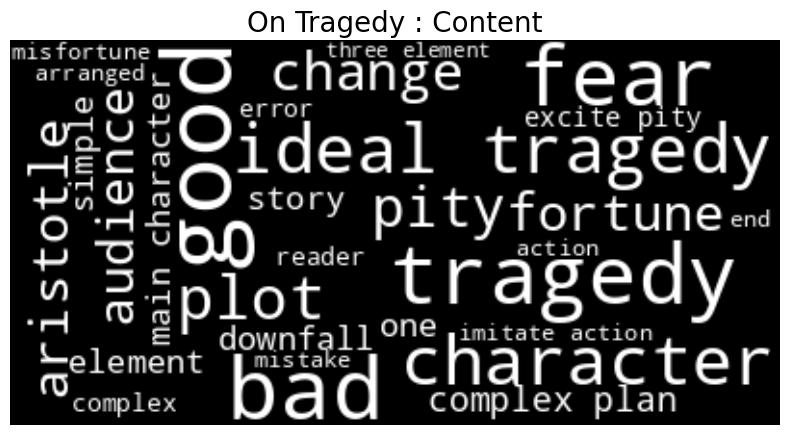

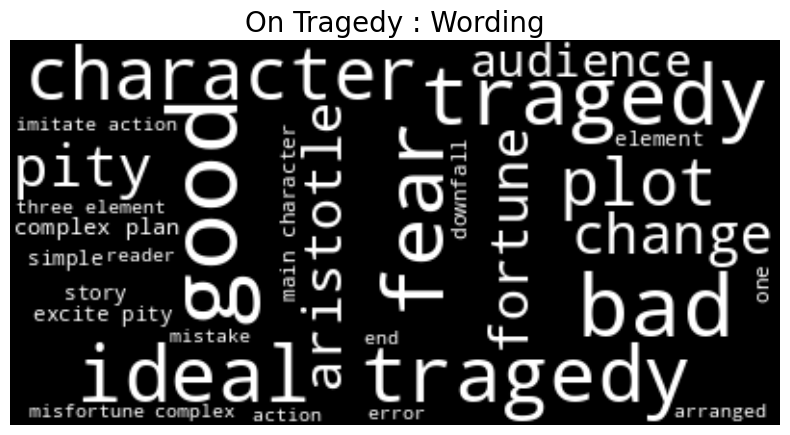

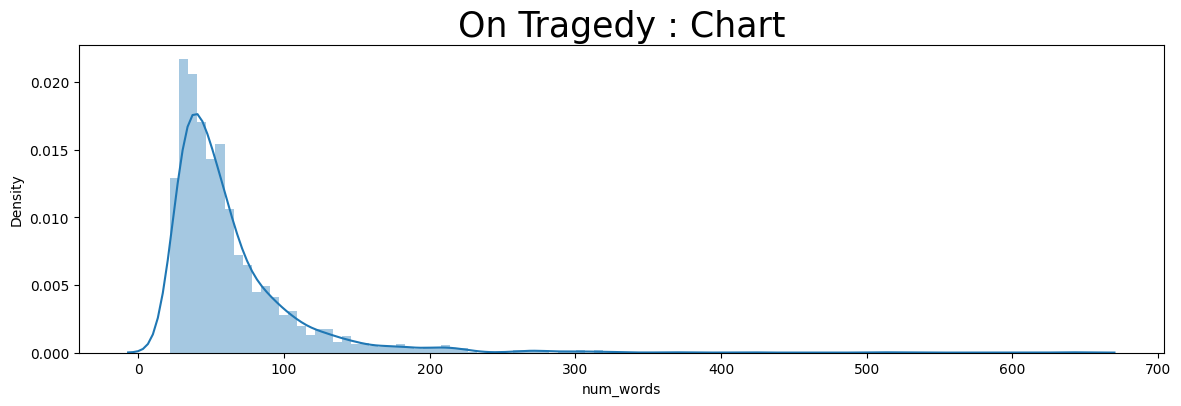

num_words  num_unique_words  num_chars  num_stopwords  \
count  2057.0000         2057.0000  2057.0000      2057.0000   
mean     62.8328           45.3500   352.0933        32.2635   
std      44.5253           23.9886   256.5065        22.6293   
min      22.0000           13.0000   125.0000         7.0000   
25%      36.0000           30.0000   199.0000        19.0000   
50%      50.0000           39.0000   278.0000        26.0000   
75%      73.0000           53.0000   409.0000        38.0000   
max     641.0000          315.0000  3711.0000       323.0000   

       num_punctuations  num_words_upper  num_words_title  mean_word_len  
count         2057.0000        2057.0000        2057.0000      2057.0000  
mean             7.7749           0.2965           3.6582         4.5803  
std              7.6694           0.6020           3.0923         0.3425  
min              0.0000           0.0000           0.0000         3.2821  
25%              3.0000           0.0000           2.0000         4.3443  
50%              5.0000           0.0000           3.0000         4.5789  
75%              9.0000           0.0000           4.0000         4.7993  
max             87.0000           6.0000          33.0000         6.5385

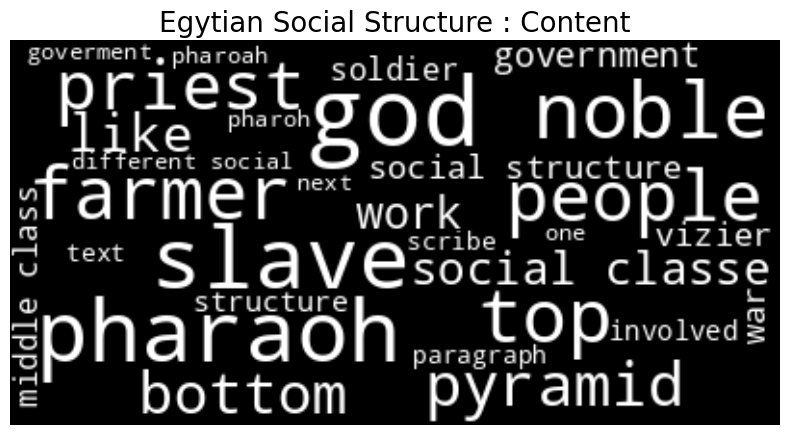

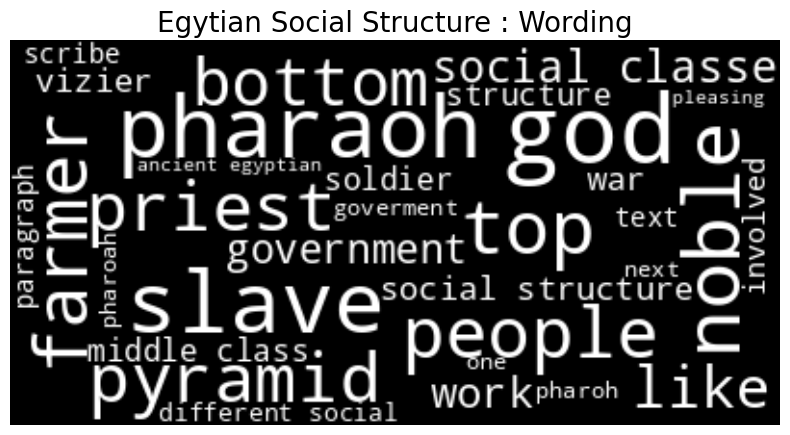

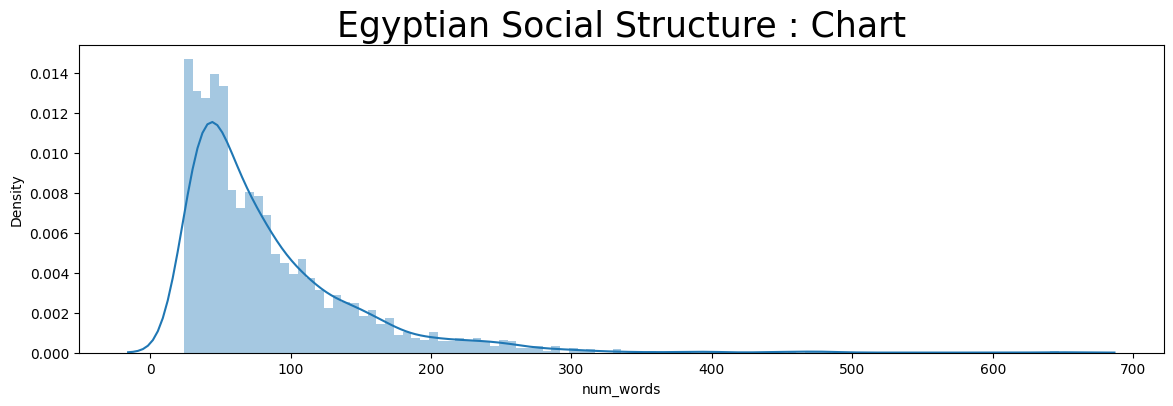

num_words  num_unique_words  num_chars  num_stopwords  \
count  2009.0000         2009.0000  2009.0000      2009.0000   
mean     83.5316           56.6341   488.8900        41.3365   
std      60.4770           33.9581   360.4702        29.7604   
min      24.0000           17.0000   114.0000         5.0000   
25%      42.0000           32.0000   244.0000        21.0000   
50%      65.0000           47.0000   374.0000        32.0000   
75%     106.0000           71.0000   611.0000        53.0000   
max     647.0000          332.0000  3940.0000       307.0000   

       num_punctuations  num_words_upper  num_words_title  mean_word_len  
count         2009.0000        2009.0000        2009.0000      2009.0000  
mean            11.6426           0.1867           6.9582         4.8131  
std             11.8796           1.1533           6.6417         0.4414  
min              0.0000           0.0000           0.0000         3.2955  
25%              4.0000           0.0000           3.0000         4.5478  
50%              8.0000           0.0000           5.0000         4.8065  
75%             15.0000           0.0000           9.0000         5.0704  
max            162.0000          41.0000          81.0000         7.0156

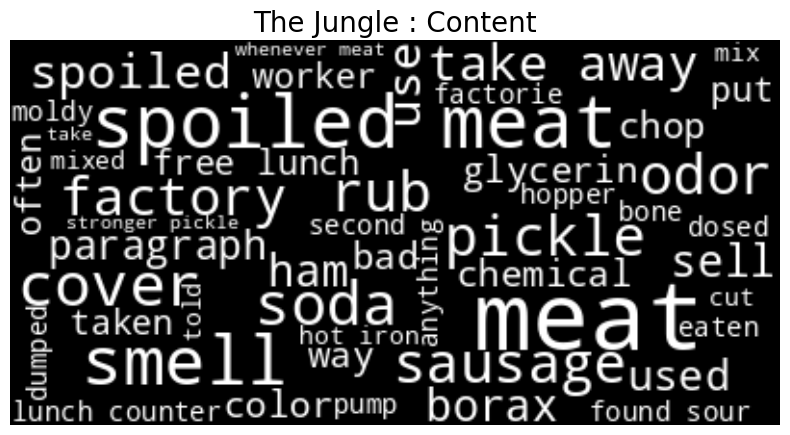

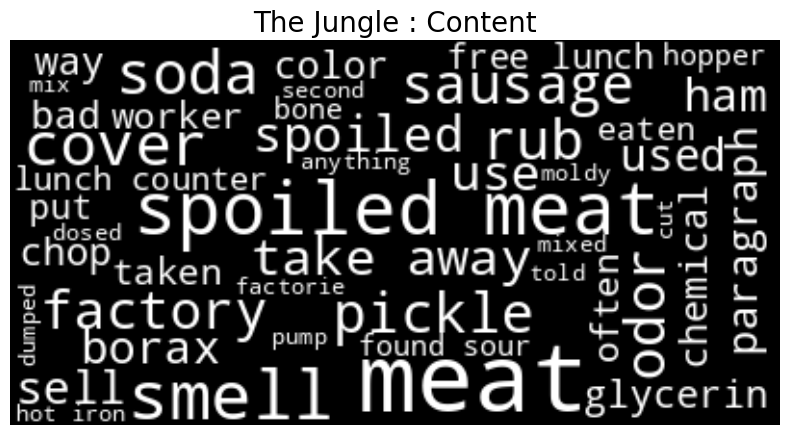

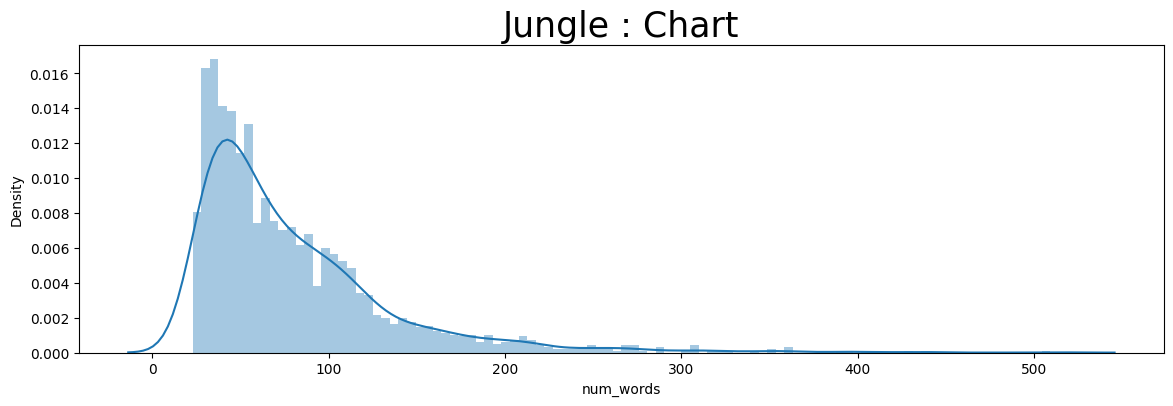

num_words  num_unique_words  num_chars  num_stopwords  \
count  1996.0000         1996.0000  1996.0000      1996.0000   
mean     79.4509           54.5040   420.7560        42.1242   
std      55.6905           30.2666   302.9265        29.4349   
min      23.0000           18.0000   115.0000         8.0000   
25%      41.0000           32.0000   214.0000        22.0000   
50%      63.0000           47.0000   330.0000        33.0000   
75%     100.0000           68.0000   527.2500        53.2500   
max     509.0000          252.0000  2775.0000       257.0000   

       num_punctuations  num_words_upper  num_words_title  mean_word_len  
count         1996.0000        1996.0000        1996.0000      1996.0000  
mean            10.3472           0.0521           3.6844         4.2630  
std              9.2133           0.3155           3.3914         0.3110  
min              0.0000           0.0000           0.0000         3.2581  
25%              4.0000           0.0000           2.0000         4.0522  
50%              8.0000           0.0000           3.0000         4.2500  
75%             14.0000           0.0000           5.0000         4.4458  
max             88.0000           8.0000          30.0000         5.8947

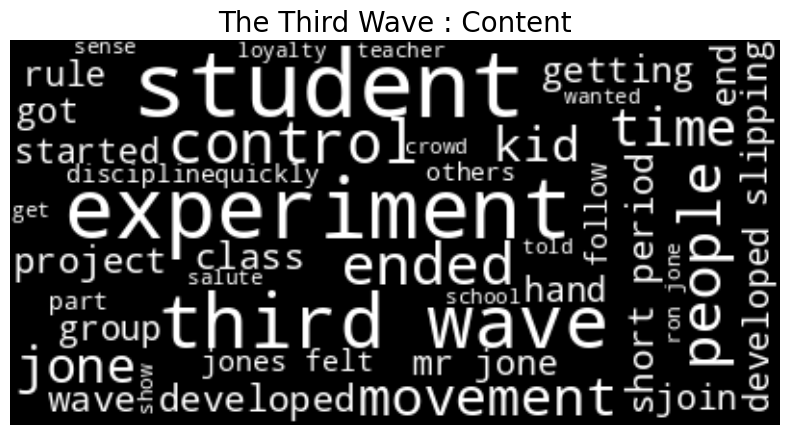

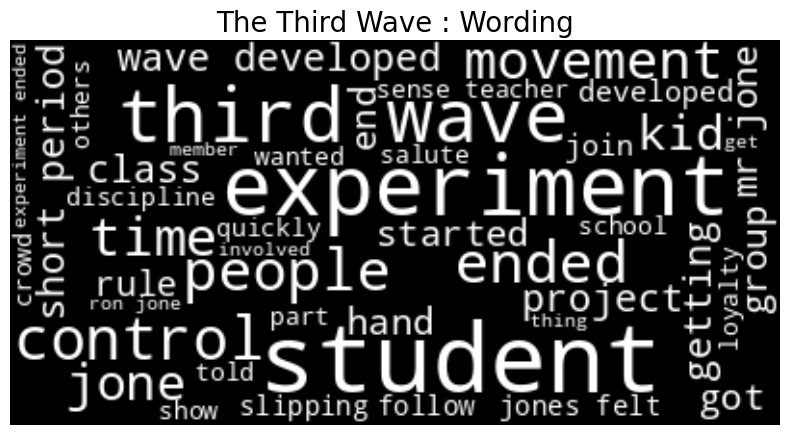

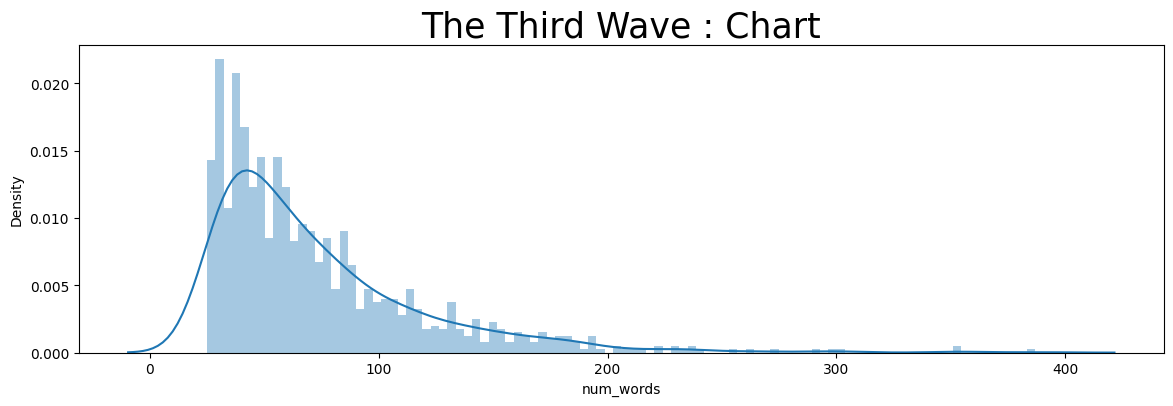

num_words  num_unique_words  num_chars  num_stopwords  \
count  1103.0000         1103.0000  1103.0000      1103.0000   
mean     72.8740           52.3753   411.8513        37.7144   
std      46.7222           26.3628   270.3186        23.9258   
min      25.0000           20.0000   118.0000        10.0000   
25%      40.0000           33.0000   221.0000        21.0000   
50%      59.0000           45.0000   332.0000        30.0000   
75%      90.0000           64.5000   507.5000        47.0000   
max     387.0000          218.0000  2297.0000       182.0000   

       num_punctuations  num_words_upper  num_words_title  mean_word_len  
count         1103.0000        1103.0000        1103.0000      1103.0000  
mean             6.3400           0.0689           5.6908         4.6200  
std              6.1569           0.2870           4.5338         0.3379  
min              0.0000           0.0000           0.0000         3.4333  
25%              3.0000           0.0000           2.0000         4.4000  
50%              4.0000           0.0000           5.0000         4.6250  
75%              8.0000           0.0000           8.0000         4.8391  
max             59.0000           3.0000          36.0000         5.7931

In [23]:
# train_prompt_id_list : ['39c16e', 'ebad26', '814d6b', '3b9047']
# 인덱스와 리스트에 있는 요소들만큼 반복하고 tqdm으로 진행 상황을 시각해준다.

for i, prompt_id in tqdm(enumerate(train_prompt_id_list)):
    
    
    # prompt_id == '39c16e' 일경우
    if prompt_id == '39c16e':
        
        # 워드 클라우드를 생성하는 함수 호출. 이 함수는 데이터프레임 train을 사용하며, col_name으로 'content'와 'wording' 열을 지정합니다. 
        # 이 함수를 통해 'On Tragedy : Content' 및 'On Tragedy : Wording' 두 개의 워드 클라우드가 생성
        generate_word_cloud(df=train, col_name='content', prompt='text', prompt_id=prompt_id, title='On Tragedy : Content')
        generate_word_cloud(df=train, col_name='wording', prompt='text', prompt_id=prompt_id, title='On Tragedy : Wording')
        
        # 텍스트 데이터의 특성을 요약하는 작업을 수행하는 함수 호출. 그 결과 train_desc와 test_desc에 각각 훈련 및 테스트 데이터의 특성 요약 정보가 저장
        # train_df : train 데이터프레임, | test_df : test 데이터프레임  | column : train 데이터프레임에서 'text' 열에 해당  |  pompt_id : 'prompt_id' 열에 고유 값, 39c16e
        train_desc, test_desc = text_description(train_df=train, test_df=test, column='text', prompt_id=prompt_id)
        
        num_words_plot(df=train, column='num_words', prompt_id=prompt_id, title='On Tragedy : Chart') #   공백으로 분할된 단어의 개수(토큰화) 시각화하는 함수 호출
        display(train_desc) # 데이터의 특성을 요약한 정보가 저장된걸 화면에 출력
        print()
        
        
    elif prompt_id == '3b9047':
        generate_word_cloud(df=train, col_name='content', prompt='text', prompt_id=prompt_id, title='Egytian Social Structure : Content')
        generate_word_cloud(df=train, col_name='wording', prompt='text', prompt_id=prompt_id, title='Egytian Social Structure : Wording')
        train_desc, test_desc = text_description(train_df=train, test_df=test, column='text', prompt_id=prompt_id)
        num_words_plot(df=train, column='num_words', prompt_id=prompt_id, title='Egyptian Social Structure : Chart')
        display(train_desc)
        print()
         
        
    elif prompt_id == 'ebad26':
        generate_word_cloud(df=train, col_name='content', prompt='text', prompt_id=prompt_id, title='The Jungle : Content')
        generate_word_cloud(df=train, col_name='wording', prompt='text', prompt_id=prompt_id, title='The Jungle : Content')
        train_desc, test_desc = text_description(train_df=train, test_df=test, column='text', prompt_id=prompt_id)
        num_words_plot(df=train, column='num_words', prompt_id=prompt_id, title='Jungle : Chart')
        display(train_desc)
        print()

        
    elif prompt_id == '814d6b':
        generate_word_cloud(df=train, col_name='content', prompt='text', prompt_id=prompt_id, title='The Third Wave : Content')
        generate_word_cloud(df=train, col_name='wording', prompt='text', prompt_id=prompt_id, title='The Third Wave : Wording')
        train_desc, test_desc = text_description(train_df=train, test_df=test, column='text', prompt_id=prompt_id)
        num_words_plot(df=train, column='num_words', prompt_id=prompt_id, title='The Third Wave : Chart')
        display(train_desc)
        print()

# Simple Preporcessing

In [24]:
# 입력받은 텍스트를 아래와 같이 전처리 진행하는 함수.
# s 는 데이터프레임에 'text' 열에서 각 행마다 학생들이 요약 해놓은 문장이 입력으로 들어온다.
def text_processor_2(s): 
    '''
    문장을 담고있는 variable을 넣어주면 
    알파벳을 제외한 문장의 모든 기호, 숫자를 제거합니다.
    
    param s : 문장을 담고있는 variable
    return : 새로운 DataFrame안에 담긴 text_processor가 적용된 column
    '''
    
    # re.sub 함수를 사용하여 정규표현식을 이용해 문장안에 괄호 (), 대괄호 [], 각괄호 <>, 중괄호 {} 를 제거
    pattern = r'\([^)]*\)'  # ()
    s = re.sub(pattern=pattern, repl='', string=s)
    
    pattern = r'\[[^)]*\]'  # []
    s = re.sub(pattern=pattern, repl='', string=s)
    
    pattern = r'\<[^)]*\>'  # <>
    s = re.sub(pattern=pattern, repl='', string=s)
    
    pattern = r'\{[^)]*\}'  # {}
    s = re.sub(pattern=pattern, repl='', string=s)
    
    s = s.replace("'", '') # 작은 따옴표를 제거

    pattern = r'[^a-zA-Z0-9]' # 알파벳과 숫자를 제외한 ,모든 특수 문자 및 기호를 제거
    s = re.sub(pattern=pattern, repl= ' ', string=s) 
    
    s_split = s.split() # 공백기준으로 단어를 분리
    
    
    # 특정 예외 단어들을 처리 isnt와 같이 줄임말을 is not으로 분리 (축약어)
    not_list0 = ['isnt', 'arent', 'wasnt', 'werent',  
                 'didnt', 'dont', 'doesnt',
                 'hasnt', 'havent', 'hadnt',
                 'neednt', 'darent',
                 'oughtnt', 'mustnt',
                 'wouldnt', 'couldnt', 'shouldnt'] 

    not_list1 = ['cant', 'want'] 
    
    s_list = [] # 전처리된 단어들을 다시 하나의 문자열로 결합한 결과를 저장하기 위한 빈 리스트
    
    # 단어 단위로 나눈 후 위에서 지정한대로 특정한 예외 단어들을 처리 후 리스트에 추가.
    for word in s_split:
        if len(word) != 1:
            if word in not_list0: # 공백기준으로 분리된 단어(word)에서 위에서 not_list0 에서 예외 처리한 단어가 포함되어있으면
                s_list.append(word[:-2]) # s_list 안에 word에 있는 단어를 추가하는데 뒤에서 2단어는 제외하고 추가 (isnt -> 뒤에 2단어인 nt는 제외하고 is 만 추가)
                s_list.append('not') # 'isnt'와 같은 축약어는 is not으로 만들 예정 , 지금은 s_list에  ['is', 'not']  이런식으로 저장
                
            elif word == not_list1[0]: # 공백기준으로 분리된 단어(word)에서 not_list1에서 예외 처리한 단어(cant)가 포함되어있으면 
                s_list.append('cannot') # 'cant'는 'cannot' 으로 변경 후 s_list에 추가
                
            elif word == not_list1[1]: # 공백기준으로 분리된 단어(word)에서 not_list1에서 예외 처리한 단어(want)가 포함되어있으면 
                s_list.append('will') # 'want'는 'will not' 으로 만들 예정, 지금은 s_list에  ['will', 'not']  이런식으로 저장
                s_list.append('not')
            else: # 특정 예외 단어가 아닌것들은 s_list에 추가
                s_list.append(word)  # e.g.  ['help', 'duck', 'hungry'] 이런식으로 되어 있는 단어들을 s_list 에 추가 
                
                
    s = " ".join(s_list) # ['is', 'not'] 이런식으로 s_list에 저장 되어있는 각 요소들 사이에 공백을 추가해서 하나의 문장으로 다시 만든다.  -> ['is not']
#     print(s)
#     print(type(s))
    
    return s # 전처리된 단어들을 다시 하나의 문자열로 결합한 결과를 반환

In [25]:
def preprocessing(df, column):
    
    # Unicode 문자를 ASCII로 변환하는 unidecode.unidecode 함수를 사용하여 특정 열(column)의 데이터에 적용, 이렇게 함으로써 문자열에 포함된 특수 문자나 다양한 언어의 문자를 표준 ASCII 문자로 변환
    df[column] = df[column].map(unidecode.unidecode) 
    df[column] = df[column].str.lower() #  특정 열(column)의 문자열을 소문자로 변환. 이는 대소문자를 구분하지 않고 텍스트를 처리하기 위한 것
    
    # \n: 개행 문자 (LineFeed. 다음 행으로 바꿈) \r: 개행 문자 (CarriageReturn. 커서를 행의 앞으로 이동)
    # \r: 은  ('     ads')  이런식으로 문자열이 저장되어 있으면 커서를 맨 앞으로 이동해서 'ads' 이렇게 만들어준다. 공백제거.
    # 여기에서는 개행문자들을 공백 으로 대체한다. 줄바꿈도 공백으로 대체
    df[column] = df[column].str.replace('\r', ' ').str.replace('\n', ' ') 
    
    if column == 'text': # 특정열이 'text'인 경우
        
        temp =[] # 빈 리스트 temp를 생성, 전처리된 텍스트 데이터를 저장하기 위한 리스트
        
        # train.shape[0] # 데이터프레임의 행의 개수를 보여줌 , train.shape[1] # 데이터프레임의 열의 개수를 보여줌
        for row_num in range(df.shape[0]): # 데이터 프레임의 모든 행의 개수만큼 반복
            text_row = text_processor_2(df[column][row_num]) # text_processor_2 함수를 사용하여 각 행의 텍스트 데이터를 전처리 및 text_row에 결과 저장.
            temp.append(text_row) # 전처리 된 텍스트 데이터('text_row')를 temp 리스트에 추가
        df[column] = pd.Series(temp) # 전처리 완료된 텍스트를 데이터 프레임의 해당 열에 할당
        
    return df

In [26]:
for column in train.columns[:6]: # train 데이터 프레임에 'prompt_id', 'prompt_question', 'prompt_title', 'prompt_text', 'student_id', 'text' 열의 내용  반복
    train_processed = preprocessing(train, column) # train 데이터프레임과, column 정보를  preprocessing 함수에 전달해서 전처리가 완료된 데이터프레임을 반환받고 train_processed에 저장
print('train_processed.head(5) : \n')
train_processed.head(5) # 지금은 text_description 함수에 문제가 있어서 prompt_id에 마지막 값인 '814d6b' 에 해당하는 조건만 텍스트 통계가 반영됨. (추후에 수정 예정.)

train_processed.head(5) : 



prompt_id                                    prompt_question prompt_title  \
0    39c16e  summarize at least 3 elements of an ideal trag...   on tragedy   
1    39c16e  summarize at least 3 elements of an ideal trag...   on tragedy   
2    39c16e  summarize at least 3 elements of an ideal trag...   on tragedy   
3    39c16e  summarize at least 3 elements of an ideal trag...   on tragedy   
4    39c16e  summarize at least 3 elements of an ideal trag...   on tragedy   

                                         prompt_text    student_id  \
0  chapter 13   as the sequel to what has already...  00791789cc1f   
1  chapter 13   as the sequel to what has already...  0086ef22de8f   
2  chapter 13   as the sequel to what has already...  0094589c7a22   
3  chapter 13   as the sequel to what has already...  00cd5736026a   
4  chapter 13   as the sequel to what has already...  00d98b8ff756   

                                                text  content  wording  \
0  element of an ideal tragedy is that it should ...  -0.2106  -0.4714   
1  the three elements of an ideal tragedy are hav...  -0.9702  -0.4171   
2  aristotle states that an ideal tragedy should ...  -0.3878  -0.5842   
3  one element of an ideal tragedy is having comp...   0.0889  -0.5947   
4  the ideal of tragedy is how complex you need t...  -0.6873  -0.4609   

   num_words  num_unique_words  num_chars  num_stopwords  num_punctuations  \
0        NaN               NaN        NaN            NaN               NaN   
1        NaN               NaN        NaN            NaN               NaN   
2        NaN               NaN        NaN            NaN               NaN   
3        NaN               NaN        NaN            NaN               NaN   
4        NaN               NaN        NaN            NaN               NaN   

   num_words_upper  num_words_title  mean_word_len  
0              NaN              NaN            NaN  
1              NaN              NaN            NaN  
2              NaN              NaN            NaN  
3              NaN              NaN            NaN  
4              NaN              NaN            NaN

In [27]:
for column in test.columns[:6]: # test 데이터프렘임의 'prompt_id', 'prompt_question', 'prompt_title', 'prompt_text', 'student_id', 'text' 열의 내용  반복
    test_processed = preprocessing(test, column) # test 데이터프레임과, column 정보를  preprocessing 함수에 전달해서 전처리가 완료된 데이터프레임을 반환받고 test_processed에 저장
print('test_processed.head(5) : \n')
test_processed.head(5) # 전처리 완료된 데이터프레임 확인, 테스트 데이터프레임도 text_description 함수에 문제가 있어서 텍스트 통계관련 열은 전부 nan값으로 되어있음.

test_processed.head(5) : 



prompt_id prompt_question     prompt_title      prompt_text    student_id  \
0    abc123    summarize...  example title 1  heading text...  000000ffffff   
1    abc123    summarize...  example title 1  heading text...  222222cccccc   
2    def789    summarize...  example title 2  heading text...  111111eeeeee   
3    def789    summarize...  example title 2  heading text...  333333dddddd   

           text num_words num_unique_words num_chars num_stopwords  \
0  example text       NaN              NaN       NaN           NaN   
1  example text       NaN              NaN       NaN           NaN   
2  example text       NaN              NaN       NaN           NaN   
3  example text       NaN              NaN       NaN           NaN   

  num_punctuations num_words_upper num_words_title mean_word_len  
0              NaN             NaN             NaN           NaN  
1              NaN             NaN             NaN           NaN  
2              NaN             NaN             NaN           NaN  
3              NaN             NaN             NaN           NaN

# Spell Check

- 철자가 틀린 단어를 대체하기 위해 TextBlob을 사용했으나. 하지만 @friendofsatoshi가   파이스펠체커가 훨씬 더 잘 작동한다고 언급했기 때문에(여기) 두 가지를 비교해야 했습니다.

In [28]:
# read_csv() 로 텍스트 파일도 불러올 수 있다 구분자는 공백으로 설정하고 파싱 엔진을 python을 선택하는 옵션
# engine 인자는 기본값으로 c로 설정되어있고 파싱 엔진 속도도 빠르지만 파이썬 엔진의 기능이 더 안정적으로이고 다양한 형식을 지원해서 파이썬을 많이쓴다.
symspell_freq_dict = pd.read_csv('/kaggle/input/symspell-677/symspell_freq_dict.txt', sep = " ", engine='python')

# symspell_freq_dict 데이터프레임의 열 이름을 set_axis()를 word, key로 변경
symspell_freq_dict = symspell_freq_dict.set_axis(axis=1, labels=['word','key']) 
the_temp = pd.DataFrame({'word' : ['the'], 'key':[23135851162]}) # word' 열에 'the' 라는 값과 'key' 열에 23135851162라는 값을 가지는 데이터프레임 생성

# symspell_freq_dict 데이터프레임과 the_temp 데이터프레임을 합칩니다. 두 데이터프레임을 합치기 위해 concat 함수를 사용하고, 
# sort_index 메서드를 사용하여 인덱스를 다시 정렬 마지막으로, 불필요한 'index' 열을 삭제하고 인덱스를 다시 재설정하여 최종 symspell_freq_dict 데이터프레임을 얻는다.
# symspell_freq_dict = pd.concat([symspell_freq_dict.reset_index(), the_temp]).sort_index().drop(columns='index').reset_index().drop(columns='index')
symspell_freq_dict = pd.concat([symspell_freq_dict, the_temp], ignore_index=True) # gpt가 좀더 간단하게 해준건데  상관없지 않을까? 


print('symspell_freq_dict=\n')
symspell_freq_dict.head(5) # 처음 5개 행을 출력하여 결과를 확인

symspell_freq_dict=



word          key
0   of  13151942776
1  and  12997637966
2   to  12136980858
3    a   9081174698
4   in   8469404971

### symspell_freq_dict.txt  파일 내용

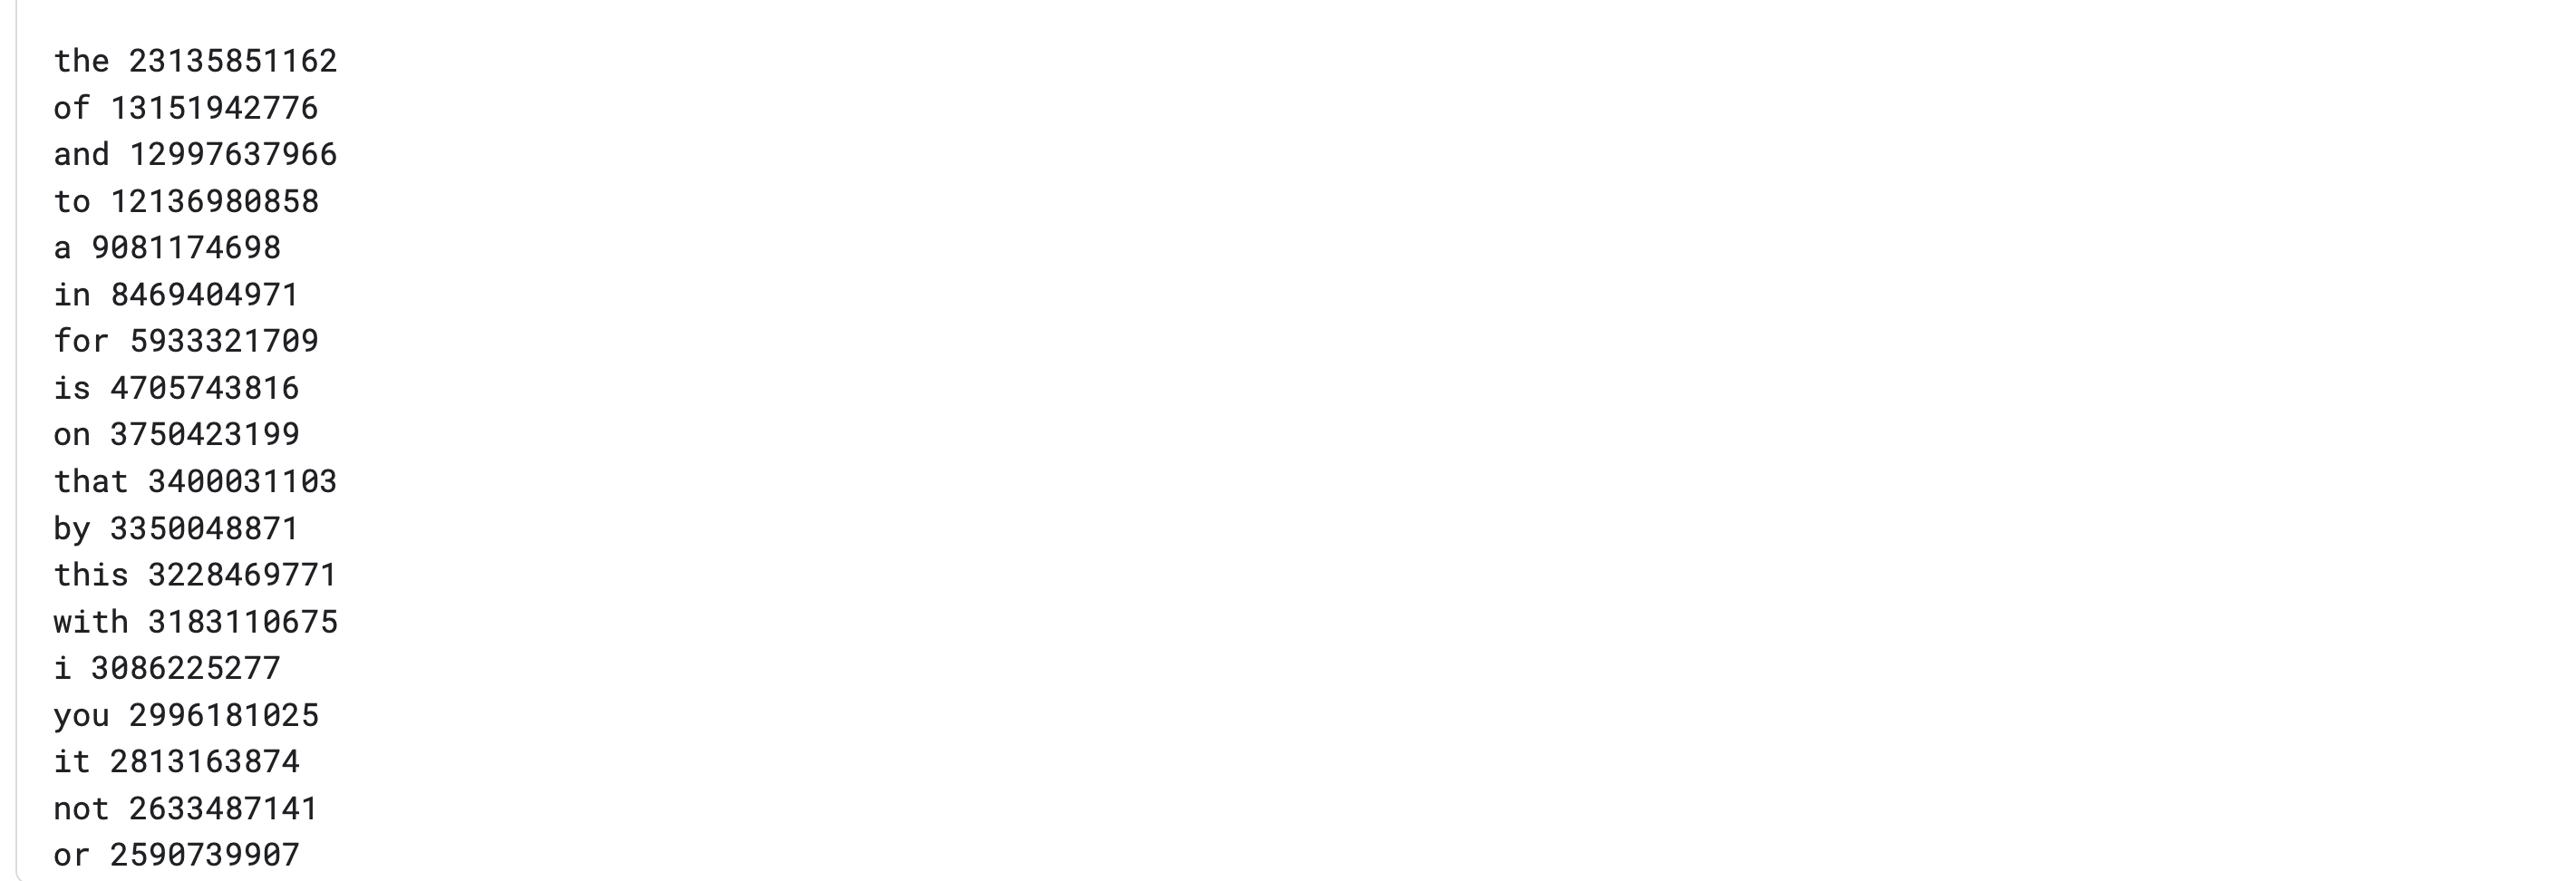

In [29]:
# manual grammarly 수동 문법?
s = "I started my schooling as the majority did in my area, at the local primarry school. I thenwent to the local secondarry school and recieved grades in English, Maths, Phisics,Biology, Geography, Art, Graphical Comunication and Philosophy of Religeon. I'll not bore you with the 'A' levels and above. Notice the ambigous English qualification above. It was, in truth, a cource dedicated to reading 'Lord of the flies' and other gems, and a weak atempt at getting us to commprehend them. Luckilly my middle-class upbringing gave me a head start as I was already aquainted with that sort of langauge these books used (and not just the Peter and Jane books) and had read simillar books before. I will never be able to put that paticular course down as much as I desire to because, for all its faults, it introduced me to Steinbeck, Malkovich and the wonders of Lenny, mice and pockets."

# original_sentence (원래 문장)
# number of miss spelled words detected by grammarly (문법적으로 감지된 철자가 틀린 단어 수)
# grammarly detected wrong words (문법적으로 감지된 잘못된 단어)
print(f'original_sentence =\n{s}'
'\n\n\nnumber of miss spelled words detected by grammarly: 16\n\n\
\ngrammarly detected wrong words :\n\
primarry,\n\
thenwent,\n\
secondarry,\n\
recieved,\n\
Phisics,\n\
Comunication,\n\
Religeon,\n\
ambigous,\n\
cource,\n\
atempt,\n\
commprehend,\n\
Luckilly,\n\
aquainted,\n\
langauge,\n\
simillar,\n\
paticular\n\
')
grammarly_corrected_words = "I started my schooling as the majority did in my area, at the local primary school. I then went to the local secondary school and received grades in English, Maths, Physics,Biology, Geography, Art, Graphical communication and Philosophy of Religion. I'll not bore you with the 'A' levels and above. Notice the ambiguous English qualification above. It was, in truth, a course dedicated to reading 'Lord of the flies' and other gems, and a weak attempt at getting us to comprehend them. Luckily my middle-class upbringing gave me a head start as I was already acquainted with that sort of language these books used (and not just the Peter and Jane books) and had read similar books before. I will never be able to put that particular course down as much as I desire to because, for all its faults, it introduced me to Steinbeck, Malkovich and the wonders of Lenny, mice and pockets."
print(f'\n{grammarly_corrected_words}')

original_sentence =
I started my schooling as the majority did in my area, at the local primarry school. I thenwent to the local secondarry school and recieved grades in English, Maths, Phisics,Biology, Geography, Art, Graphical Comunication and Philosophy of Religeon. I'll not bore you with the 'A' levels and above. Notice the ambigous English qualification above. It was, in truth, a cource dedicated to reading 'Lord of the flies' and other gems, and a weak atempt at getting us to commprehend them. Luckilly my middle-class upbringing gave me a head start as I was already aquainted with that sort of langauge these books used (and not just the Peter and Jane books) and had read simillar books before. I will never be able to put that paticular course down as much as I desire to because, for all its faults, it introduced me to Steinbeck, Malkovich and the wonders of Lenny, mice and pockets.


number of miss spelled words detected by grammarly: 16


grammarly detected wrong words :
primarr

In [30]:
# TextBlob은 텍스트 데이터를 처리하기 위한 Python 라이브러리 
# 품사 태깅, 명사 구문 추출, 감성 분석, 분류, 번역 등과 같은 일반적인 자연어 처리(NLP) 작업을 수행

def textblob_correction(sentence): # 영어 텍스트의 맞춤법 교정을 수행
    try:
        sentence = re.sub(r'[^\w\s]','',sentence) # 정규표현식을 사용하여 문장에서 알파벳과 공백을 제외한 모든 문자를 제거
        
        corrected = '' # 교정된 문장을 저장하기 위한 빈 문자열을 생성
        misspelled_words = [] #  맞춤법이 틀린 단어를 저장하기 위한 리스트
        corrected_words = [] # 맞춤법이 틀린 단어를 교정한 결과를 저장하기 위한 리스트
        
        for word in tqdm(sentence.split()): # 문장을 공백을 기준으로 단어를 분할하고 각 단어에 대해 반복 및 진행상황 표시
            w = str(TextBlob(word).correct()) # TextBlob 라이브러리를 사용하여 단어를 교정하고 교정된 결과를 w에 저장
            corrected = corrected + ' ' + w # 이전까지 수정된 단어들과 현재 처리중인 단어를 공백으로 구분하여 하나의 문자열로 합치고 저장
            
            if word != w: # word는 수정되기전 단어, w는 교정된 단어 이 둘을 비교해서 같지 않을경우
                misspelled_words.append(word) # 맞춤법이 틀린 단어를 misspelled_words 리스트에 추가
                corrected_words.append(w) # 맞춤법이 틀린 단어를 교정한 결과를 저장하기 위한 리스트
                
        misspelled_words_count = 0 # 교정되지 않은 단어 중에서 실제로 오타가 있는 틀린 단어의 수를 계산하기 위한 변수
        
        for word in corrected: # 교정된 문자열 'corrected' 안의 각 단어를 하나씩 확인
            
            # 현재 단어(word, 교정된 각 단어)가 맞춤법이 틀린 단어 리스트(misspelled_words)에 포함되어 있다면
            # 즉, 이 단어가 교정된 단어가 아니라 오타가 있던 단어라서 교정이 안된 케이스를 의미하는 듯
            if word in misspelled_words: 
                misspelled_words_count += 1 # 수정되지 은 원래의 오타가 있는 단어의 개수가 저장
                
        # 교정된 문장, 맞춤법이 틀린 단어의 목록, 교정된 단어의 목록, 맞춤법이 틀린 단어의 총 수를 반환        
        return corrected, misspelled_words, corrected_words, len(misspelled_words) - misspelled_words_count
    
    # UnicodeDecodeError 예외가 발생하면 원래 문장을 반환
    # UnicodeDecodeError는 텍스트 데이터를 처리할 때 발생하는 일반적인 에러 중 하나로
    # 인코딩문제나, 텍스트데이터에 올바르지 않은 유니코드 문자가 포함되어 있는경우, 파일 손상으로 열리지 않는 등 이러한 경우에 에러 발생
    except UnicodeDecodeError:
        return sentence 
    
    
    
    
# 스펠링 오류가 있는 텍스트를 교정하고 교정된 텍스트를 반환    
def spell_checker(sentence):
    try:
        sentence = re.sub(r'[^\w\s]', '', sentence) # 정규표현식을 사용해서 입력문자열 sentence에서 문자와 공백(space)을 제외한 모든 문자를 제거
        spell = SpellChecker() # PySpellChecker의 SpellChecker 객체 생성 스펠링 오류를 교정하는 객체
        tokens = nltk.word_tokenize(sentence) # 입력 문자열(sentence)를 단어 단위로 토큰화, nltk 의 word_tokenize 함수를 사용 (리스트 형태로 반환)
        text_length = len(tokens) # 토큰화 된 길이를 text_length에 저장
        
  
        
        # SpellChecker.unknown() : 사전에 나타나지 않는 '단어'의 하위 집합. (즉 스펠링 오류가 있는 토큰들을 반환)
        # isalpha() : 단어들이 전부 스펠링으로 이루어져 있는지 확인하는 파이썬 내장함수, 숫자 및 공백이 포함되어있으면 False 반환
        # 스펠링 오류가 있는 토큰만 선택하여 mis_tokens에 저장합니다. 단, 이 토큰들은 알파벳으로만 이루어져 있다. 
        mis_tokens = [token for token in spell.unknown(tokens) if token.isalpha()]
        temp = [] # 스펠링 오류가 있는 교정 전 단어와 교정 후 단어를 딕셔너리 형태로 묶어서 리스트에 저장
        corrected_words = [] # 스펠링 오류가 교정된 단어를 저장하는 리스트 생성
        
        
        for word in tqdm(mis_tokens): # 스펠링 오류가 있는 각 토큰들을 하나씩 확인
            
            # SpellChecker.correction() : 스펠링 오류가 있는 단어를 가장 가능성이 높은 단어로 수정해서 리턴
            corrected_word = spell.correction(word) # 스펠링 오류를 교정하고 저장
            temp.append({word : corrected_word})  # 교정 전 단어와 교정 후 단어를 딕셔너리 형태로 묶어 'tmep' 리스트에 추가
            corrected_words.append(corrected_word) # 교정된 단어를 corrected_words 리스트에 추가

        
        
        temp_1 = [] # 교정된 단어를 저장하기 위한 변수 ?? 뭐하러 또?
        for word in tokens: # 토큰화된 단어(원본 단어)를 하나씩 확인하면서 확인
            
            # 스펠링 오류가 있는 교정전 단어와 교정후 단어의 딕셔너리 형태로 묶인 리스트 (전체 단어가 아님)
            # (딕셔너리 형태를 한번에 리스트로 감싸서 그런지 set_에 정보가 한번에 다 들어가진다.), 그래서 반복문 한번만 실행됨.
            # set_ 은 딕셔너리 타입임
            for set_ in temp: 
                
                # keys() : 스펠링 오류가 있는 교정전 단어들이 key값으로 들어가져 있는데 그걸 리스트로 변환 후 그중 첫번째 값만 불러옴 ('교정전 단어의 첫번째 값')
                # 토큰화된 (교정전 토큰화된 단어, 원본 단어)단어와 비교해서 같을 경우. 즉 교정된 단어가 없을경우
                if list(set_.keys())[0] == word: 
                    word = list(set_.values())[0] # 교정된 단어를 리스트 형태로 변환하고 첫번째 값을 word에 저장
                    if word in temp_1: # 교정된 단어가 temp1 에 있는 경우 계속 아무것도 안하고 반복문 진행
                        continue
                    else: # 교정된 단어가 temp1에 없는 경우 
                        temp_1.append(word) # 교정된 단어를  temp_1 리스트에 추가
            
            
            if word in temp_1: # 원본단어가 교정된 단어안에 포함되어 있으면 패스
                continue
            else: # 원본단어가 교정된 단어안에 포함되어 있지 않으면 temp_1 리스트를 추가
                temp_1.append(word) 
                

        final_sentence = ' ' # temp 1에 저장된 단어를 이용하여 최종 문장을 만들 준비
        for word in temp_1: 
            
            if word.isalpha() or word.isnumeric() == True: # 각 수정된 단어가 알파벳 또는 숫자인 경우
                final_sentence = final_sentence + word + ' ' # 공백과 함깨 final_sentence 에 추가
            elif word in [',', '.', '"', "'", '(', ')', '[', ']', '{', '}']: # 수정된 단어가 위에 나열된 구두점 중 하나와 일치하는 경우
                final_sentence = final_sentence + word # final_sentence 에 추가 
        
        # 최종 문장에서 두 개 이상의 연속된 공백을 하나의 공백으로 대체하고 문장 앞뒤에 있는 불 필요한 공백을 제거
        final_sentence = final_sentence.replace('  ', ' ').strip() 
        
        # 교정된 문장, 잘못된 단어 리스트, 교정된 단어 리스트, 잘못된 단어 리스트의 개수(길이)를 반환
        return final_sentence, mis_tokens, corrected_words, len(mis_tokens)
    
    # UnicodeDecodeError 예외가 발생하면 원래 문장을 반환
    # UnicodeDecodeError는 텍스트 데이터를 처리할 때 발생하는 일반적인 에러 중 하나로
    # 인코딩문제나, 텍스트데이터에 올바르지 않은 유니코드 문자가 포함되어 있는경우, 파일 손상으로 열리지 않는 등 이러한 경우에 에러 발생
    except UnicodeDecodeError:
        return sentence
    
    
    

# 입력된 문장에서 잘못된 단어를 수정하고 수정된 결과와 관련 정보들을 바노한
def symspellpy_correction(sentence):
    
    try: #  예외 처리 블록, 예외가 발생하면 처리할 수 있도록 한다.
        sentence = re.sub(r'[^\w\s]','',sentence) # 정규표현식을 사용하여 문장에서 알파벳과 공백을 제외한 모든 문자를 제거
        
        # SymSpell 객체를 생성 : 철자 오류를 수정하는데 사용
        # max_dictionary_edit_distance (int) : 단어를 검색할 때 허용되는 최대 편집 거리를 나타냄
        # 편집 거리란 두 문자열 간의 문자 삽입, 삭제 또는 교체 작업이 필요한 횟수,  e.g. ('cat', 'cot') 에서 몇번의 수정이 있어야 동일한지 
        # prefix_length (int) : SymSpell에서 사용하는 접두사 최대 길이를 나타냄, 트라이(Trie) 자료 구조를 사용 (문자열을 저장 및 효율적 탐색을 하는 트리 형태 자료구조)
        # 길이를 증가시킬수록 검색 속도가 향상될 수 있지만 메모리 사용량도 증가하게 됨
        sym_spell = SymSpell(max_dictionary_edit_distance= 3, prefix_length= 7) 
        freq_dict = "kaggle/input/symspell-677/symspell_freq_dict.txt" # 미리 정의된 단어 빈도 사전 파일의 경로를 지정.
        
        # symspell 객체에 스펠링 사전 파일을 로드하고 어떤 열이 단어를 나타내는지 어떤 열이 단어의 빈도수를 나타내는지 지정
        # freq_dict(스펠링 사전의 경로를 나타내는 곳), term_index (스펠링 사전에서 단어를 나타내는 열의 인덱스를 지정), 
        # count_index (스펠링 사전에서 빈도수를 나타내는 열의 인덱스를 지정)
        sym_spell.load_dictionary(freq_dict, term_index=0, count_index=1)
        
        # SymSpell을 사용하여 주어진 문장을 수정, lookup_compound() : 주어진 문장에서 복합어를 찾고 수정된 결과를 반환
        # 올바른 단어에 실수로 공백을 삽입하여 두 개의 잘못된 용어가 생성된 경우 
        # 두 개의 올바른 단어 사이에 실수로 공백을 생략하여 하나의 잘못된 결합 용어가 생성된 경우
        # 맞춤법 오류가 있거나 없는 여러 개의 독립적인 입력 용어 등을 찾음
        terms = sym_spell.lookup_compound(sentence, max_edit_distance=2) 
        
        corrected_sentence = terms[0].term # 수정된 결과를 'terms' 리스트에서 가져와 corrected_sentence 변수에 저장
        
        misspelled_words = [] # 잘못된 단어를 저장하기 위한 리스트
        corrected_words = [] # 교정된 단어를 저장하기 위한 리스트
        
        for word in tqdm(sentence.lower().split()): # 문장을 소문자로 변환하고 공백을 기준으로 나눈뒤 반복문을 시작
            if word not in list(symspell_freq_dict['word']): # 현재 단어가 미리 정의된 단어 빈도 사전에 없으면 (즉, 잘못된 단어라면)
                misspelled_words.append(word)# 잘못된 단어를 misspelled_words 리스트에 추가 
                
                # SymSpell을 사용하여 잘못된 단어를 수정하고 수정된 결과를 corrected_words 리스트에 추가합니다.
                # .term : 맞춤법이 올바른 단어를 제안
                corrected_words.append(sym_spell.lookup_compound(word, max_edit_distance=2)[0].term) 
         

        return corrected_sentence, misspelled_words, corrected_words, len(misspelled_words)
    
    # UnicodeDecodeError 예외가 발생하면 원래 문장을 반환
    # UnicodeDecodeError는 텍스트 데이터를 처리할 때 발생하는 일반적인 에러 중 하나로
    # 인코딩문제나, 텍스트데이터에 올바르지 않은 유니코드 문자가 포함되어 있는경우, 파일 손상으로 열리지 않는 등 이러한 경우에 에러 발생
    except UnicodeDecodeError:
        return sentence
    

# 입력 받은 문장을 스펠링 오류를 수정하고 수정된 결과, 어떤 단어들이 수정되었는지, 수정된 단어의 수가 몇개인지를 반환하는 함수.
def autocorrect_correction(sentence):
    try: 
        spell = Speller(lang='en') # autocorrect 라이브러리에서 제공하는 'Speller' 클래스의 인스턴스를 생성, 영어 스펠링을 자동으로 수정하는데 사용
        corrected_sentence = spell(sentence) # Speller 객체를 사용하여 입력문장 'sentence'를 자동으로 수정, 수정된 문장은 변수에 저장
        
        misspelled_words = [] # 잘못된 단어를 담기 위한 빈 리스트
        corrected_words = [] # 수정된 단어를 담기 위한 빈 리스트
        
        for word in tqdm(sentence.lower().split()): # 입력 문장을 전부 소문자로 변경 후 공백 기준으로 분리 
            w = spell(word) # 분리된 단어를 spell 함수를 이용해 스펠링을 자동 수정.
            if w != word: # 수정된 단어가 원래 단어와 다를 경우
                misspelled_words.append(word) # 잘못된 단어(원래 단어)를 빈 리스트에 추가
                corrected_words.append(w) # 수정된 단어는 corrected_words 빈 리스트 추가
        
        # 수정된 문장, 잘못된 단어 리스트, 수정(교정)된 단어 리스트, 잘못된 단어리스트 개수
        return corrected_sentence, misspelled_words, corrected_words, len(misspelled_words)
    
    
    # UnicodeDecodeError 예외가 발생하면 원래 문장을 반환
    # UnicodeDecodeError는 텍스트 데이터를 처리할 때 발생하는 일반적인 에러 중 하나로
    # 인코딩문제나, 텍스트데이터에 올바르지 않은 유니코드 문자가 포함되어 있는경우, 파일 손상으로 열리지 않는 등 이러한 경우에 에러 발생
    except UnicodeDecodeError:
        return sentence

In [31]:
# 각 문자열 처리 함수를 실행시켜 문자열 처리에 대한 반환값을 얻는다.
# cor_sent : 교정이 완료된 문자열
# mis_spell : 틀린 단어의 리스트
# corrected_words : 교정된 단어의 리스트
# num_mis_spell : 수정된 단어의 수(맞춤법이 틀린 단어의 총 수)

print(f'\n{("*" * 10) + " textblob_correction " + ("*" * 10)}\n\n')

cor_sent, mis_spell, corrected_words, num_mis_spell = textblob_correction(s)
print(f'list of misspelled words = \n{mis_spell}\n\n')
print(f'list of corrected words = \n{corrected_words}\n\n')
print(f'number of misspelled words = \n{num_mis_spell}\n\n')




print(f'{("*" * 10) + " pyspellchecker_correction " + ("*" * 10)}\n\n')

cor_sent, mis_spell, corrected_words, num_mis_spell = spell_checker(s)

print(f'list of misspelled words = \n{mis_spell}\n\n list of corrected words = \n{corrected_words}\n\n number of misspelled words = \n{num_mis_spell}\n\n')



print(f'{("*" * 10) + " symspellpy_correction " + ("*" * 10)}\n\n')

cor_sent, mis_spell, corrected_words, num_mis_spell = symspellpy_correction(s)

print(f'list of misspelled words = \n{mis_spell}\n\n list of corrected words = \n{corrected_words}\n\n number of misspelled words = \n{num_mis_spell}\n\n')



print(f'{("*" * 10) + " autocorrect_correction " + ("*" * 10)}\n\n')

cor_sent, mis_spell, corrected_words, num_mis_spell = autocorrect_correction(s)

print(f'list of misspelled words = \n{mis_spell}\n\n list of corrected words = \n{corrected_words}\n\n number of misspelled words = \n{num_mis_spell}\n\n')
      


********** textblob_correction **********




  0%|          | 0/152 [00:00<?, ?it/s]

list of misspelled words = 
['schooling', 'primarry', 'secondarry', 'recieved', 'Maths', 'Comunication', 'Religeon', 'Ill', 'ambigous', 'cource', 'Lord', 'atempt', 'commprehend', 'Luckilly', 'aquainted', 'langauge', 'Jane', 'simillar', 'paticular', 'Lenny']


list of corrected words = 
['choosing', 'primary', 'secondary', 'received', 'Baths', 'Communication', 'Religion', 'All', 'ambiguous', 'course', 'Word', 'attempt', 'comprehend', 'Luckily', 'acquainted', 'language', 'Lane', 'similar', 'particular', 'Penny']


number of misspelled words = 
20


********** pyspellchecker_correction **********




  0%|          | 0/18 [00:00<?, ?it/s]

list of misspelled words = 
['simillar', 'recieved', 'thenwent', 'paticular', 'malkovich', 'atempt', 'luckilly', 'steinbeck', 'religeon', 'comunication', 'aquainted', 'commprehend', 'cource', 'phisicsbiology', 'primarry', 'langauge', 'ambigous', 'secondarry']

 list of corrected words = 
['similar', 'received', 'theywant', 'particular', None, 'attempt', 'luckily', None, 'religion', 'communication', 'acquainted', 'comprehend', 'course', None, 'primary', 'language', 'ambiguous', 'secondary']

 number of misspelled words = 
18


********** symspellpy_correction **********




  0%|          | 0/152 [00:00<?, ?it/s]

list of misspelled words = 
['primarry', 'thenwent', 'secondarry', 'recieved', 'phisicsbiology', 'comunication', 'religeon', 'ambigous', 'cource', 'atempt', 'commprehend', 'luckilly', 'middleclass', 'aquainted', 'langauge', 'simillar', 'paticular', 'malkovich']

 list of corrected words = 
['primarry', 'thenwent', 'secondarry', 'recieved', 'phisicsbiology', 'comunication', 'religeon', 'ambigous', 'cource', 'atempt', 'commprehend', 'luckilly', 'middleclass', 'aquainted', 'langauge', 'simillar', 'paticular', 'malkovich']

 number of misspelled words = 
18


********** autocorrect_correction **********




  0%|          | 0/152 [00:00<?, ?it/s]

list of misspelled words = 
['primarry', 'thenwent', 'secondarry', 'phisics,biology,', 'comunication', 'religeon.', 'ambigous', 'cource', 'atempt', 'commprehend', 'aquainted', 'langauge', 'simillar', 'paticular', 'lenny,']

 list of corrected words = 
['primary', 'thewest', 'secondary', 'physics,biology,', 'communication', 'religion.', 'ambiguous', 'source', 'attempt', 'comprehend', 'acquainted', 'language', 'similar', 'particular', 'penny,']

 number of misspelled words = 
15




### It seems like symspellpy works better for me...!, 작성자는 symspellpy가 더 맞는다는 얘기

<b>'thenwent', 'phisicsbiology' 는 제가 symspellpy를 선택하게 된 데 중요한 역할을 했습니다</b> <br>
그러나 모든 문장에 대해 symspellpy를 실행하려고하면 시간이 오래 걸리고 "저장"할 수 없습니다.
따라서 먼저 철자가 틀린 단어를 pyspellchecker (분명히 더 빠름)로 감지하고 목록에 추가합니다. <br>

그런 다음 symspellpy를 사용하여 감지된 철자가 틀린 단어의 대체어를 찾아 사전을 만듭니다. (키: 철자가 틀린 단어, 값: 대체어)
그런 다음 .replace() 함수를 사용하여 키를 값으로 바꿉니다.<br>
이 이론을 사용하면 각 문장에 대해 symspellpy를 사용하는 것보다 시간과 메모리 효율이 더 높을 것이라고 생각합니다.

In [32]:
s = 'number, my name is temporary'

temp_dict = {'number' : 'hi', 'temporary': 'jason'}

for i in temp_dict:
    # print(i) # key 값들을 가지고 옴
    
    # replace(old(변경하고 싶은문자), new(새로 바꿀문자)) 함수로 문자열(s) 변경, 
    # get(i) 함수는 i라는 Key에 대응되는 Value를 리턴
    # 여기에서는 replace() 함수를 이용해 'number' -> 'hi', 'temporary' -> 'json' 이렇게 변경함
    s = s.replace(i, temp_dict.get(i)) 
# print(s)

df = pd.DataFrame({'a' : ['number, my name is temporary', 'number, my name is tom', 'number temporary', 'hello hello'], 'b' : [0, 1, 2, 24]})
display(df) # 데이터프레임 생성 및 출력



# 데이터프레임의 특정 열 내에 있는 텍스트 데이터를 처리하는 역할.
def temp_def(df, column):
    
    temp = [] # 빈 리스트 생성, 처리된 텍스트를 저장하기 위한 용도.
    
    for row_num in tqdm(range(df.shape[0])): # 데이터프레임의 행의 크기(길이) 만큼 반복문 실행
        print(f'column : {column}, row_num : {row_num}')
        sentence = df[column][row_num] # 현재 선택된 데이터프레임의 텍스트 데이터를 sentence에 저장
        tokens = nltk.word_tokenize(sentence) # setence에 저장된 문장을 nltk 라이브러리를 이용하여 단어를 분할(토큰화)

        for i in temp_dict: # temp_dict에 저장된 key값이 순차적으로 순회하면서 반복
            if i in sentence: # 현재 순회중인 단어(key값)가 sentence 에 포함되어 있는지 확인하고.
                sentence = sentence.replace(i, temp_dict.get(i)) # 포함되어 있으면 sentence에 있는 단어를 temp_dict에 존재하는 값(value)로 변경
        temp.append(sentence) # 수정이 완료된 단어는 temp  리스트에 추가 
        print()
    
    df[column] = pd.Series(temp) # 모든 행에 대해 처리가 완료되면 temp, 리스트를 이용해 원래에 데이터프레임의 열을 교체한다.
    
    return df # 변경이 완료된 최종 데이터프레임을 반환

temp_def(df, 'a')


a   b
0  number, my name is temporary   0
1        number, my name is tom   1
2              number temporary   2
3                   hello hello  24

  0%|          | 0/4 [00:00<?, ?it/s]

column : a, row_num : 0

column : a, row_num : 1

column : a, row_num : 2

column : a, row_num : 3



a   b
0  hi, my name is jason   0
1    hi, my name is tom   1
2              hi jason   2
3           hello hello  24

In [33]:
def pyspellchecker_detector(sentence):
    sentence = re.sub(r'[^\w\s]', '', sentence) # 알파벳과 공백을 제외한 모든 문자를 제거
    
    spell = SpellChecker() # pyspellchecker 라이브러리의 SpellChecker 클래스를 사용하여 스펠링 오류를 탐지하기 위한 객체를 생성
    tokens = sentence.split(' ') # 입력받은 문장을 공백을 기준으로 단어 분할하고 tokens에 리스트 형태로 저장
    mis_tokens = [] # 스펠링 오류가 있는 단어를 저장할 빈 리스트를 생성
    
    
    # unknown() : 사전에 나타나지 않는 '단어'의 하위 집합. (즉 스펠링 오류가 있는 토큰들을 반환)
    # isalpha() : 단어들이 전부 스펠링으로 이루어져 있는지 확인하는 파이썬 내장함수, 숫자 및 공백이 포함되어있으면 False 반환
    # 스펠링 오류가 있는 토큰만 선택하여 mis_tokens에 저장합니다. 단, 이 토큰들은 알파벳으로만 이루어져 있다. 
    for token in spell.unknown(tokens): # 분할된 단어 리스트(tokens)를 순회하면서 스펠링 오류가 있는 토큰들에 대해서만 반복 진행
        if token.isalpha(): # 오류가 있는 토큰들중에서 알파벳으로만 구성되어있다면
            mis_tokens.append(token) # mis_tokens 리스트에 추가
    
    return mis_tokens # 스펠링 오류가 있는 단어들의 리스트를 반환



# 
def symspellpy_correction(mis_tokens):
    try:
        
        # SymSpell 객체를 생성 : 철자 오류를 수정하는데 사용
        # max_dictionary_edit_distance (int) : 단어를 검색할 때 허용되는 최대 편집 거리를 나타냄
        # 편집 거리란 두 문자열 간의 문자 삽입, 삭제 또는 교체 작업이 필요한 횟수,  e.g. ('cat', 'cot') 에서 몇번의 수정이 있어야 동일한지 
        # prefix_length (int) : SymSpell에서 사용하는 접두사 최대 길이를 나타냄, 트라이(Trie) 자료 구조를 사용 (문자열을 저장 및 효율적 탐색을 하는 트리 형태 자료구조)
        # 길이를 증가시킬수록 검색 속도가 향상될 수 있지만 메모리 사용량도 증가하게 됨
        sym_spell = SymSpell(max_dictionary_edit_distance=3, prefix_length=7) # 스펠링 오류를 수정하는데 사용
        freq_dict = "/kaggle/input/symspell-677/symspell_freq_dict.txt" # 스펠링 사전을 불러옴, 스펠링 오류를 수정하는데 사용 (단어와 빈도수로 이루어진 파일)
        
        # symspell 객체에 스펠링 사전 파일을 로드하고 어떤 열이 단어를 나타내는지 어떤 열이 단어의 빈도수를 나타내는지 지정
        # freq_dict(스펠링 사전의 경로를 나타내는 곳), term_index (스펠링 사전에서 단어를 나타내는 열의 인덱스를 지정), 
        # count_index (스펠링 사전에서 빈도수를 나타내는 열의 인덱스를 지정)
        sym_spell.load_dictionary(freq_dict, term_index=0, count_index=1) 
        corrected_token = {} # 스펠링 오류가 수정된 결과를 담기 위한 리스트
        
        for token in tqdm(mis_tokens): # mis_tokens에 있는 각각의 토큰에 대한 반복문 실행
            
            # 현재 토큰에 대해 symspell을 사용하여 스펠링 오류를 수정 lookup_compound 메서드는 주어진 토큰을 수정하고
            # 가장 가능성 있는 수정된 단어를 반환, max_edit_distance는 단어 수정시 허용되는 최대 편집 거리를 나타낸다.
            terms = sym_spell.lookup_compound(token, max_edit_distance=2) 
            
            # 현재 토큰(스펠링 오류가 있는 토큰)이 corrected_token 딕셔너리에 없는 경우,(즉, 이전에 수정되지 않은 경우)
            if token not in corrected_token.keys():
                
                # symspell에 의해 수정된 단어를 corrected_token 딕셔너리에 추가
                # terms[0].term 은 symspell에 의해 수정된 단어를 나타낸다.
                corrected_token[token] = terms[0].term 
        
        # 모든 수정이 완료되면 corrected_token 딕셔너리를 반환하고 해당 딕셔너리에는 수정된 토큰과 그에 해당하는 원래 토큰이 매핑되어 있다.
        return corrected_token 
    
    # Unicode 디코딩 오류가 발생(스펠링 오류 수정중에 발생할 수 있는 문제)원래 mis_tokens 리스트를 그대로 반환
    except UnicodeDecodeError:
        return mis_tokens

    


# 데이터프레임의 특정 열(column)에 있는 텍스트 데이터에서 스펠링 오류를 수정하는 작업을 수행
def spellchecker(df, column): # 
    
    try:
        
        mis_tokens = [] # 스펠링 오류가 있는 토큰(단어)들을 저장하기 위한 빈 리스트 생성
        
        # 해당 반복문은 데이터프레임의 모든 행을 순회하며 스펠링 오류가 있는 토큰을 찾는 역할을 함.
        for row_num in tqdm(range(df.shape[0])): # 데이터프레임의 각 행(row)에 대한 반복문 진행
            sentence = df[column][row_num] # 현재 행에서 해당 열('column')에 있는 텍스트 데이터를 가져와서 sentence에 저장
            
            # pyspellchecker_detector 함수를 호출하여 현재 문장에서 스펠링 오류가 있는 토큰을 찾는 역할
            # 이러한 토큰들은 mis_tokens 리스트에 추가.
            for word in pyspellchecker_detector(sentence): 
                mis_tokens.append(word)
        
        # symspellpy_correction 함수를 호출하여 리스트에 있는 스펠링 오류를 수정하고 수정된 토큰과 원래 토큰의 매핑을 생성 및 저장.
        mis_token_rep = symspellpy_correction(mis_tokens)
        
        temp = [] # 수정된 토큰을 저장하기 위한 빈 리스트 생성
        
        for row_num in tqdm(range(df.shape[0])): # 데이터프레임의 각 행을 순회
            sentence = df[column][row_num] # 현재 행과 열의 위치한 텍스트 데이터를 sentence에 저장
            tokens = sentence.split(' ') # 문장을 공백 기준으로 단어를 분할하여 tokens에 리스트형태로 저장
            temp_str = '' # 수정된 토큰을 임시로 저장할 빈 문자열 'temp_str'을 생성
            
            for token in tokens: # 현재 문장의 각 토큰에 대한 반복문을 시작
                if token in mis_token_rep.keys(): # 현재 토큰이 mis_token_rep.keys() 딕셔너리에(key)에 있는 경우 (즉, 스펠링 오류가 수정된 경우)
                    temp_str = temp_str + " " + mis_token_rep.get(token) # temp_str에 수정된 토큰을 추가
                else: 
                    temp_str = temp_str + " " + token # 현재 토큰이 mis_token_rep에 없는 경우 (즉 스펠링 오류가 수정되지 않은 경우) 아래 코드 실행
            temp.append(temp_str) # 원래 토큰을 그대로 temp_str에 추가
            
        df[column] = pd.Series(temp) # 모든 행을 처리한 후에 수정된 토큰으로 ("column")을 업데이트 한다.
        
        return df # 최종적으로 수정된 데이터프레임을 반환
                
    except UnicodeDecodeError:
        return sentence

In [34]:
train_processed = spellchecker(train_processed, 'text') # train 데이터프레임의 "text" 열에 있는 텍스트 데이터의 스펠링 오류를 수정하고
train_processed['text'][0] # 수정된 데이터프레임의 첫번째 행의 내용을 확인

  0%|          | 0/7165 [00:00<?, ?it/s]

  0%|          | 0/11328 [00:00<?, ?it/s]

  0%|          | 0/7165 [00:00<?, ?it/s]

' element of an ideal tragedy is that it should be arranged on complex plan another element of an ideal tragedy is that it should only have one main issue the last element of an ideal tragedy is that it should have double thread plot and an opposite catastrophe for both good and bad'

In [35]:
test_processed = spellchecker(test_processed, 'text') # test 데이터프레임의 "text" 열에 있는 텍스트 데이터의 스펠링 오류를 수정하고
test_processed['text'] # 수정된 데이터프레임의 첫번째 행의 내용을 확인

  0%|          | 0/4 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

0     example text
1     example text
2     example text
3     example text
Name: text, dtype: object

# Word Cloud, Text Statistic, Num Words

0it [00:00, ?it/s]

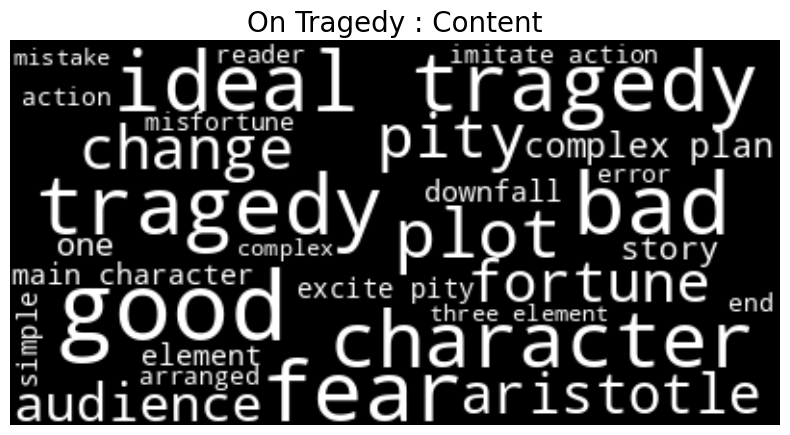

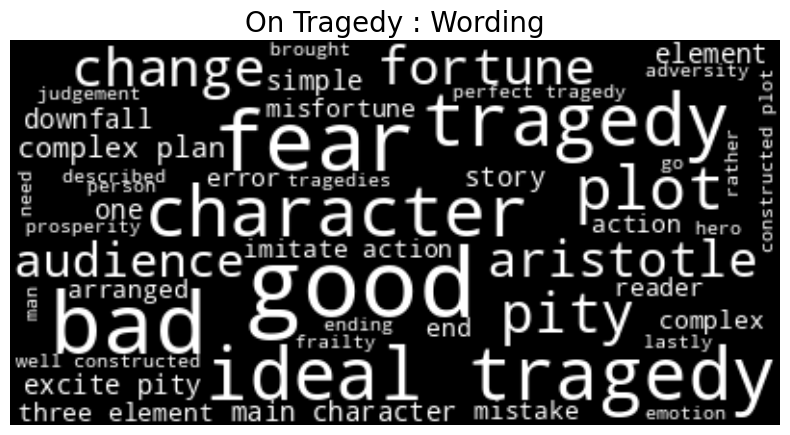

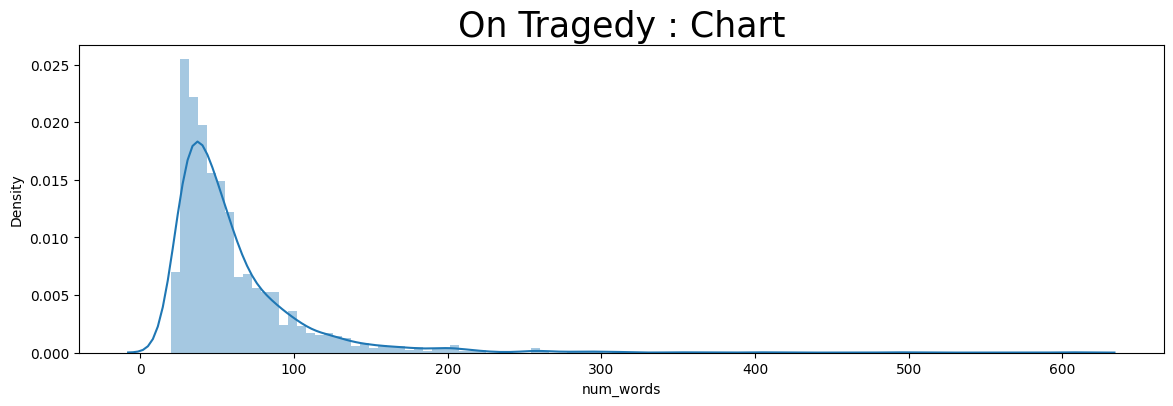

num_words  num_unique_words  num_chars  num_stopwords  \
count  2057.0000         2057.0000  2057.0000      2057.0000   
mean     60.0651           41.4176   337.2766        30.6213   
std      42.8876           20.8094   244.5194        22.3174   
min      20.0000           12.0000   111.0000         6.0000   
25%      34.0000           28.0000   191.0000        17.0000   
50%      47.0000           36.0000   266.0000        24.0000   
75%      70.0000           48.0000   392.0000        36.0000   
max     606.0000          268.0000  3500.0000       311.0000   

       num_punctuations  num_words_upper  num_words_title  mean_word_len  
count         2057.0000        2057.0000        2057.0000      2057.0000  
mean             0.0010           0.0000           0.0000         4.6079  
std              0.0312           0.0000           0.0000         0.3215  
min              0.0000           0.0000           0.0000         3.3889  
25%              0.0000           0.0000           0.0000         4.3968  
50%              0.0000           0.0000           0.0000         4.6098  
75%              0.0000           0.0000           0.0000         4.8000  
max              1.0000           0.0000           0.0000         6.3200

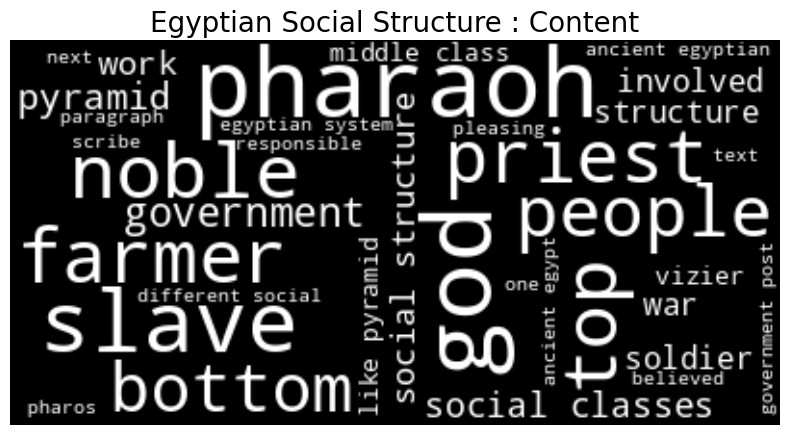

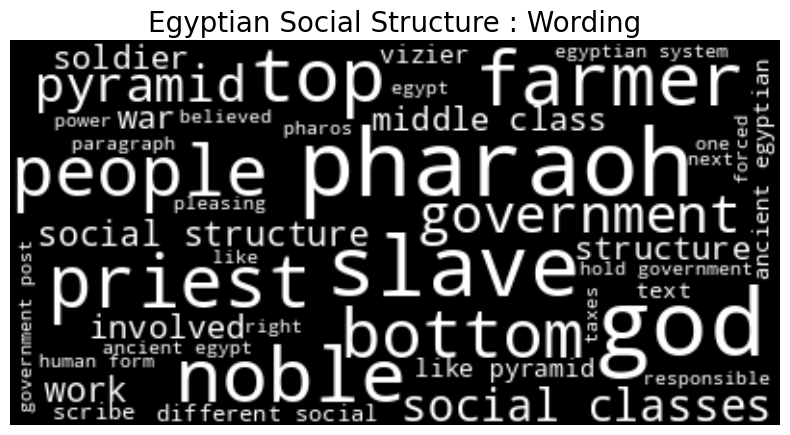

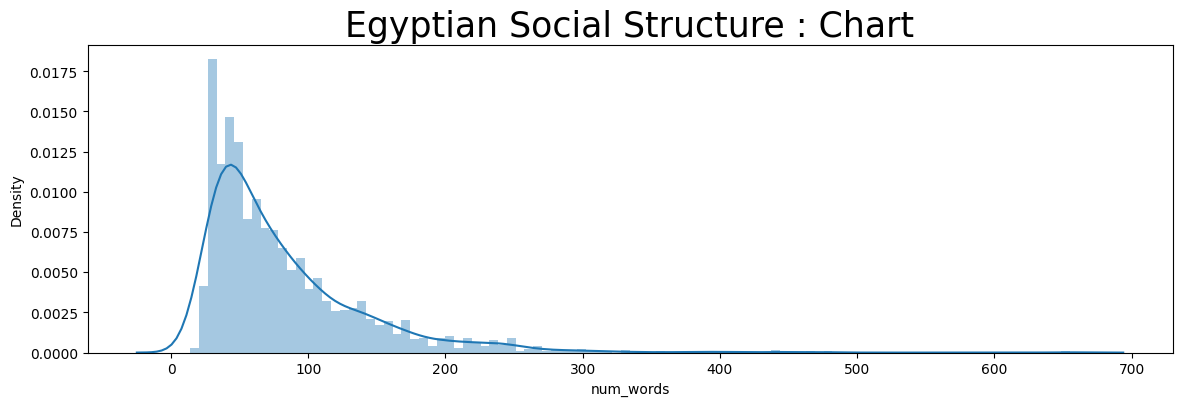

num_words  num_unique_words  num_chars  num_stopwords  \
count  2009.0000         2009.0000  2009.0000      2009.0000   
mean     82.2135           50.9104   469.7148        41.1827   
std      59.4019           28.7634   343.5154        29.7423   
min      14.0000           12.0000    85.0000         5.0000   
25%      42.0000           30.0000   236.0000        20.0000   
50%      64.0000           43.0000   360.0000        32.0000   
75%     104.0000           63.0000   589.0000        53.0000   
max     655.0000          265.0000  3822.0000       310.0000   

       num_punctuations  num_words_upper  num_words_title  mean_word_len  
count         2009.0000        2009.0000        2009.0000      2009.0000  
mean             0.0000           0.0000           0.0000         4.6995  
std              0.0000           0.0000           0.0000         0.3829  
min              0.0000           0.0000           0.0000         3.2791  
25%              0.0000           0.0000           0.0000         4.4754  
50%              0.0000           0.0000           0.0000         4.6957  
75%              0.0000           0.0000           0.0000         4.9302  
max              0.0000           0.0000           0.0000         6.6667

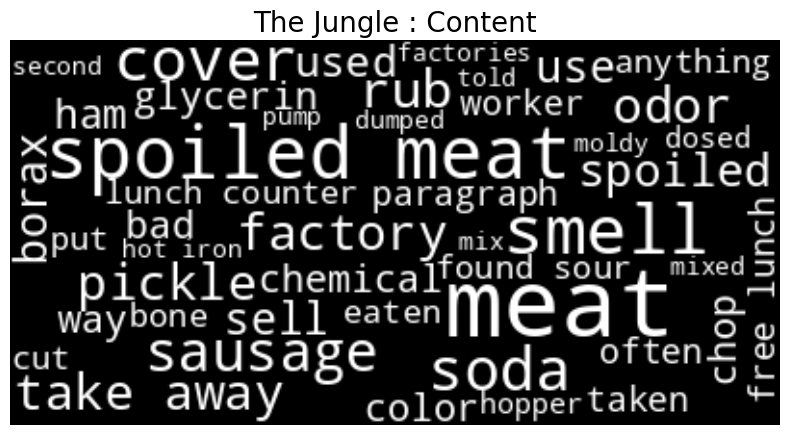

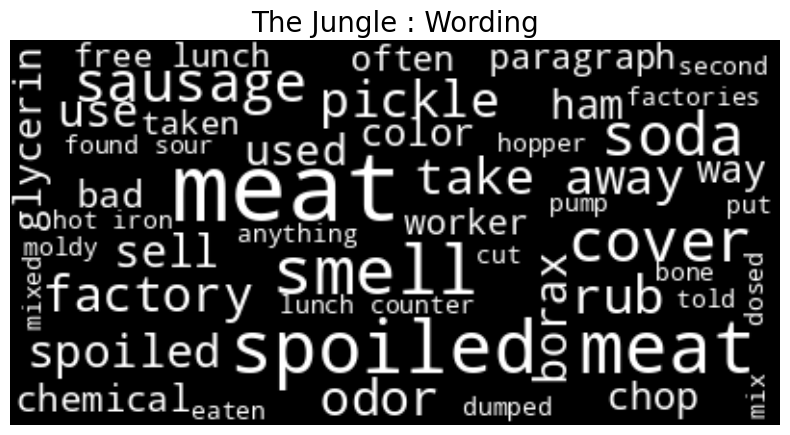

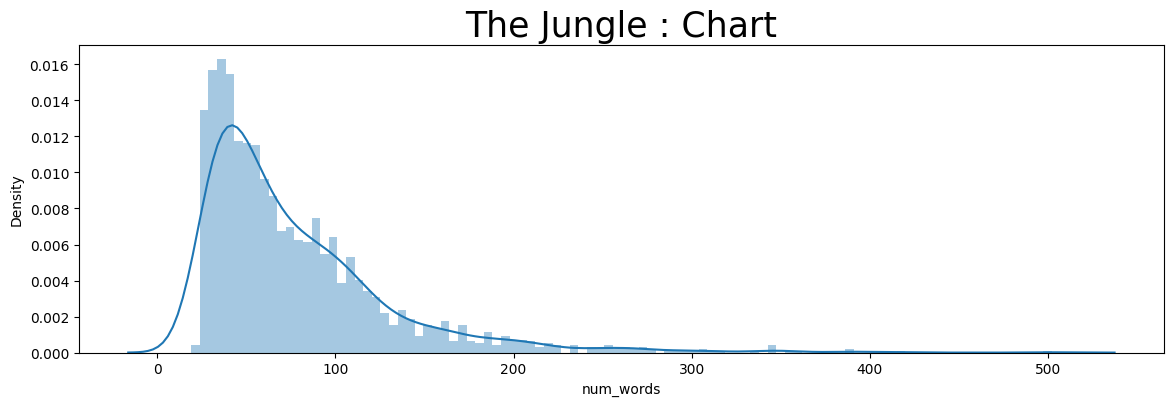

num_words  num_unique_words  num_chars  num_stopwords  \
count  1996.0000         1996.0000  1996.0000      1996.0000   
mean     77.5962           49.7485   401.9023        42.3592   
std      53.8414           26.3457   285.4093        29.3754   
min      19.0000           15.0000    84.0000         8.0000   
25%      40.0000           30.0000   208.0000        22.0000   
50%      61.0000           43.0000   317.0000        34.0000   
75%      98.0000           62.0000   501.0000        54.0000   
max     502.0000          210.0000  2659.0000       260.0000   

       num_punctuations  num_words_upper  num_words_title  mean_word_len  
count         1996.0000        1996.0000        1996.0000      1996.0000  
mean             0.0005           0.0000           0.0000         4.1545  
std              0.0224           0.0000           0.0000         0.2920  
min              0.0000           0.0000           0.0000         3.1111  
25%              0.0000           0.0000           0.0000         3.9504  
50%              0.0000           0.0000           0.0000         4.1446  
75%              0.0000           0.0000           0.0000         4.3289  
max              1.0000           0.0000           0.0000         5.7097

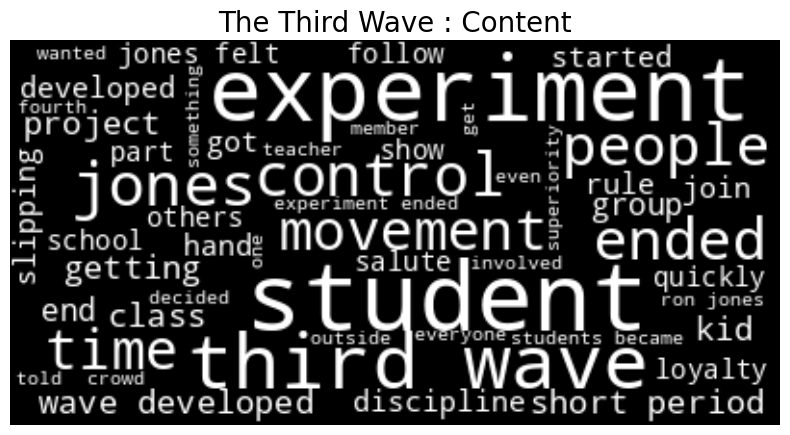

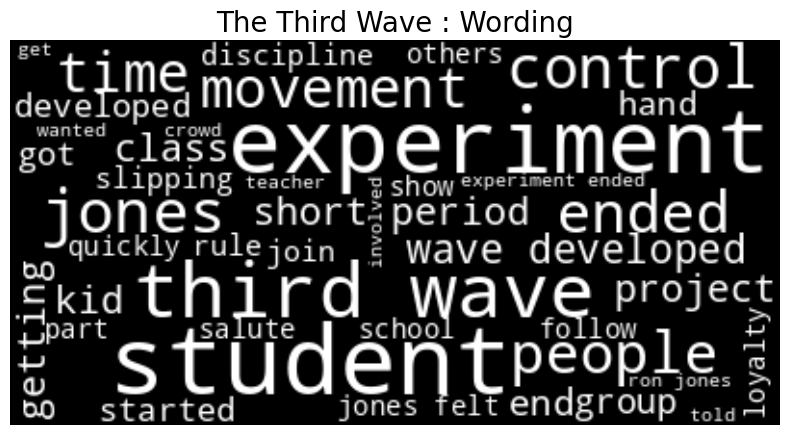

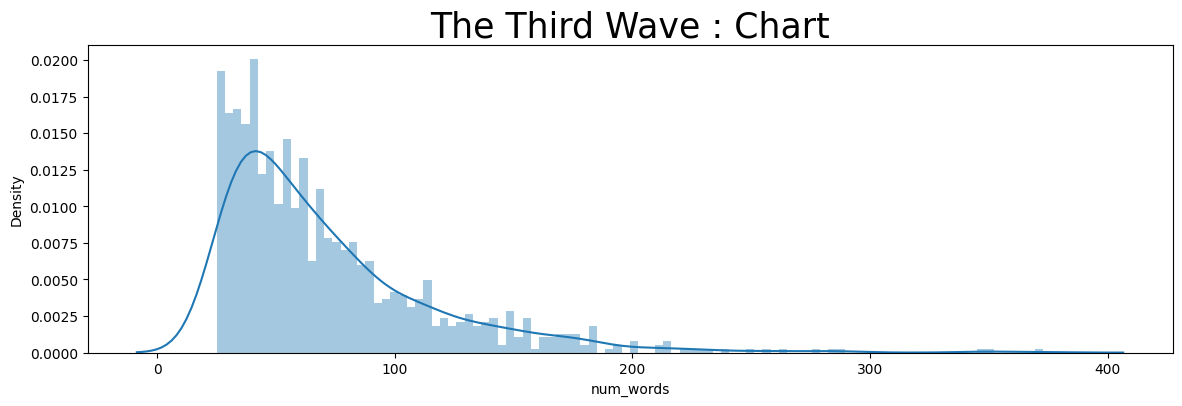

num_words  num_unique_words  num_chars  num_stopwords  \
count  1103.0000         1103.0000  1103.0000      1103.0000   
mean     71.3617           48.3853   401.6355        37.7325   
std      45.4407           23.4979   260.3923        23.8778   
min      25.0000           18.0000   116.0000        10.0000   
25%      39.0000           31.0000   217.0000        21.0000   
50%      58.0000           43.0000   324.0000        31.0000   
75%      87.5000           59.0000   493.0000        47.0000   
max     373.0000          188.0000  2171.0000       182.0000   

       num_punctuations  num_words_upper  num_words_title  mean_word_len  
count         1103.0000        1103.0000        1103.0000      1103.0000  
mean             0.0009           0.0000           0.0000         4.6025  
std              0.0301           0.0000           0.0000         0.3323  
min              0.0000           0.0000           0.0000         3.6296  
25%              0.0000           0.0000           0.0000         4.3889  
50%              0.0000           0.0000           0.0000         4.6023  
75%              0.0000           0.0000           0.0000         4.8297  
max              1.0000           0.0000           0.0000         5.5556

In [38]:
# prompt_id별로 train['text'] 에 대한 워드클라우드, text['num_words'] 단어 수에 대한 분포도, train['text'] 데이터에 대한 텍스트 통계정보를 보여줌

for i, prompt_id in tqdm(enumerate(train_prompt_id_list)):
    if prompt_id == '39c16e': # 
        generate_word_cloud(df=train_processed, col_name='content', prompt='text', prompt_id=prompt_id, title='On Tragedy : Content')
        generate_word_cloud(df=train_processed, col_name='wording', prompt='text', prompt_id=prompt_id, title='On Tragedy : Wording')
        train_desc, test_desc = text_description(train_df=train_processed, test_df=test_processed, column='text', prompt_id=prompt_id)
        num_words_plot(df=train_processed, column='num_words', prompt_id=prompt_id, title='On Tragedy : Chart')
        display(train_desc)
        print()
    elif prompt_id == '3b9047':
        generate_word_cloud(df=train_processed, col_name='content', prompt='text', prompt_id=prompt_id, title='Egyptian Social Structure : Content')
        generate_word_cloud(df=train_processed, col_name='wording', prompt='text', prompt_id=prompt_id, title='Egyptian Social Structure : Wording')
        train_desc, test_desc = text_description(train_df=train_processed, test_df=test_processed, column='text', prompt_id=prompt_id)
        num_words_plot(df=train_processed, column='num_words', prompt_id=prompt_id, title='Egyptian Social Structure : Chart')
        display(train_desc)
        print()
    elif prompt_id == 'ebad26':
        generate_word_cloud(df=train_processed, col_name='content', prompt='text', prompt_id=prompt_id, title='The Jungle : Content')
        generate_word_cloud(df=train_processed, col_name='wording', prompt='text', prompt_id=prompt_id, title='The Jungle : Wording')
        train_desc, test_desc = text_description(train_df=train_processed, test_df=test_processed, column='text', prompt_id=prompt_id)
        num_words_plot(df=train_processed, column='num_words', prompt_id=prompt_id, title='The Jungle : Chart')
        display(train_desc)
        print()
    elif prompt_id == '814d6b':
        generate_word_cloud(df=train_processed, col_name='content', prompt='text', prompt_id=prompt_id, title='The Third Wave : Content')
        generate_word_cloud(df=train_processed, col_name='wording', prompt='text', prompt_id=prompt_id, title='The Third Wave : Wording')
        train_desc, test_desc = text_description(train_df=train_processed, test_df=test_processed, column='text', prompt_id=prompt_id)
        num_words_plot(df=train_processed, column='num_words', prompt_id=prompt_id, title='The Third Wave : Chart')
        display(train_desc)
        print()